## HRI Trust Paper Plots

This Jupyter Notebook generates the plots for the HRI trust review paper, utilizing the 'hri_trust_studies.csv' dataset.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import numpy as np
from matplotlib.colors import rgb2hex

def filter_data(df, column, value=None, value_range=None):
    if value is not None:
        return df[df[column] == value]
    elif value_range is not None:
        return df[(df[column] >= value_range[0]) & (df[column] <= value_range[1])]
    else:
        return df

# Load data
data = pd.read_csv('hri_trust_studies.csv')
data = filter_data(data, column='Publication Year', value_range=[2015,2024])

# number of unique studies
print(f'Number of unique papers: {data["Title"].nunique()}')
print(f'Number of studies: {len(data["Title"])}')

Number of unique papers: 616
Number of studies: 689


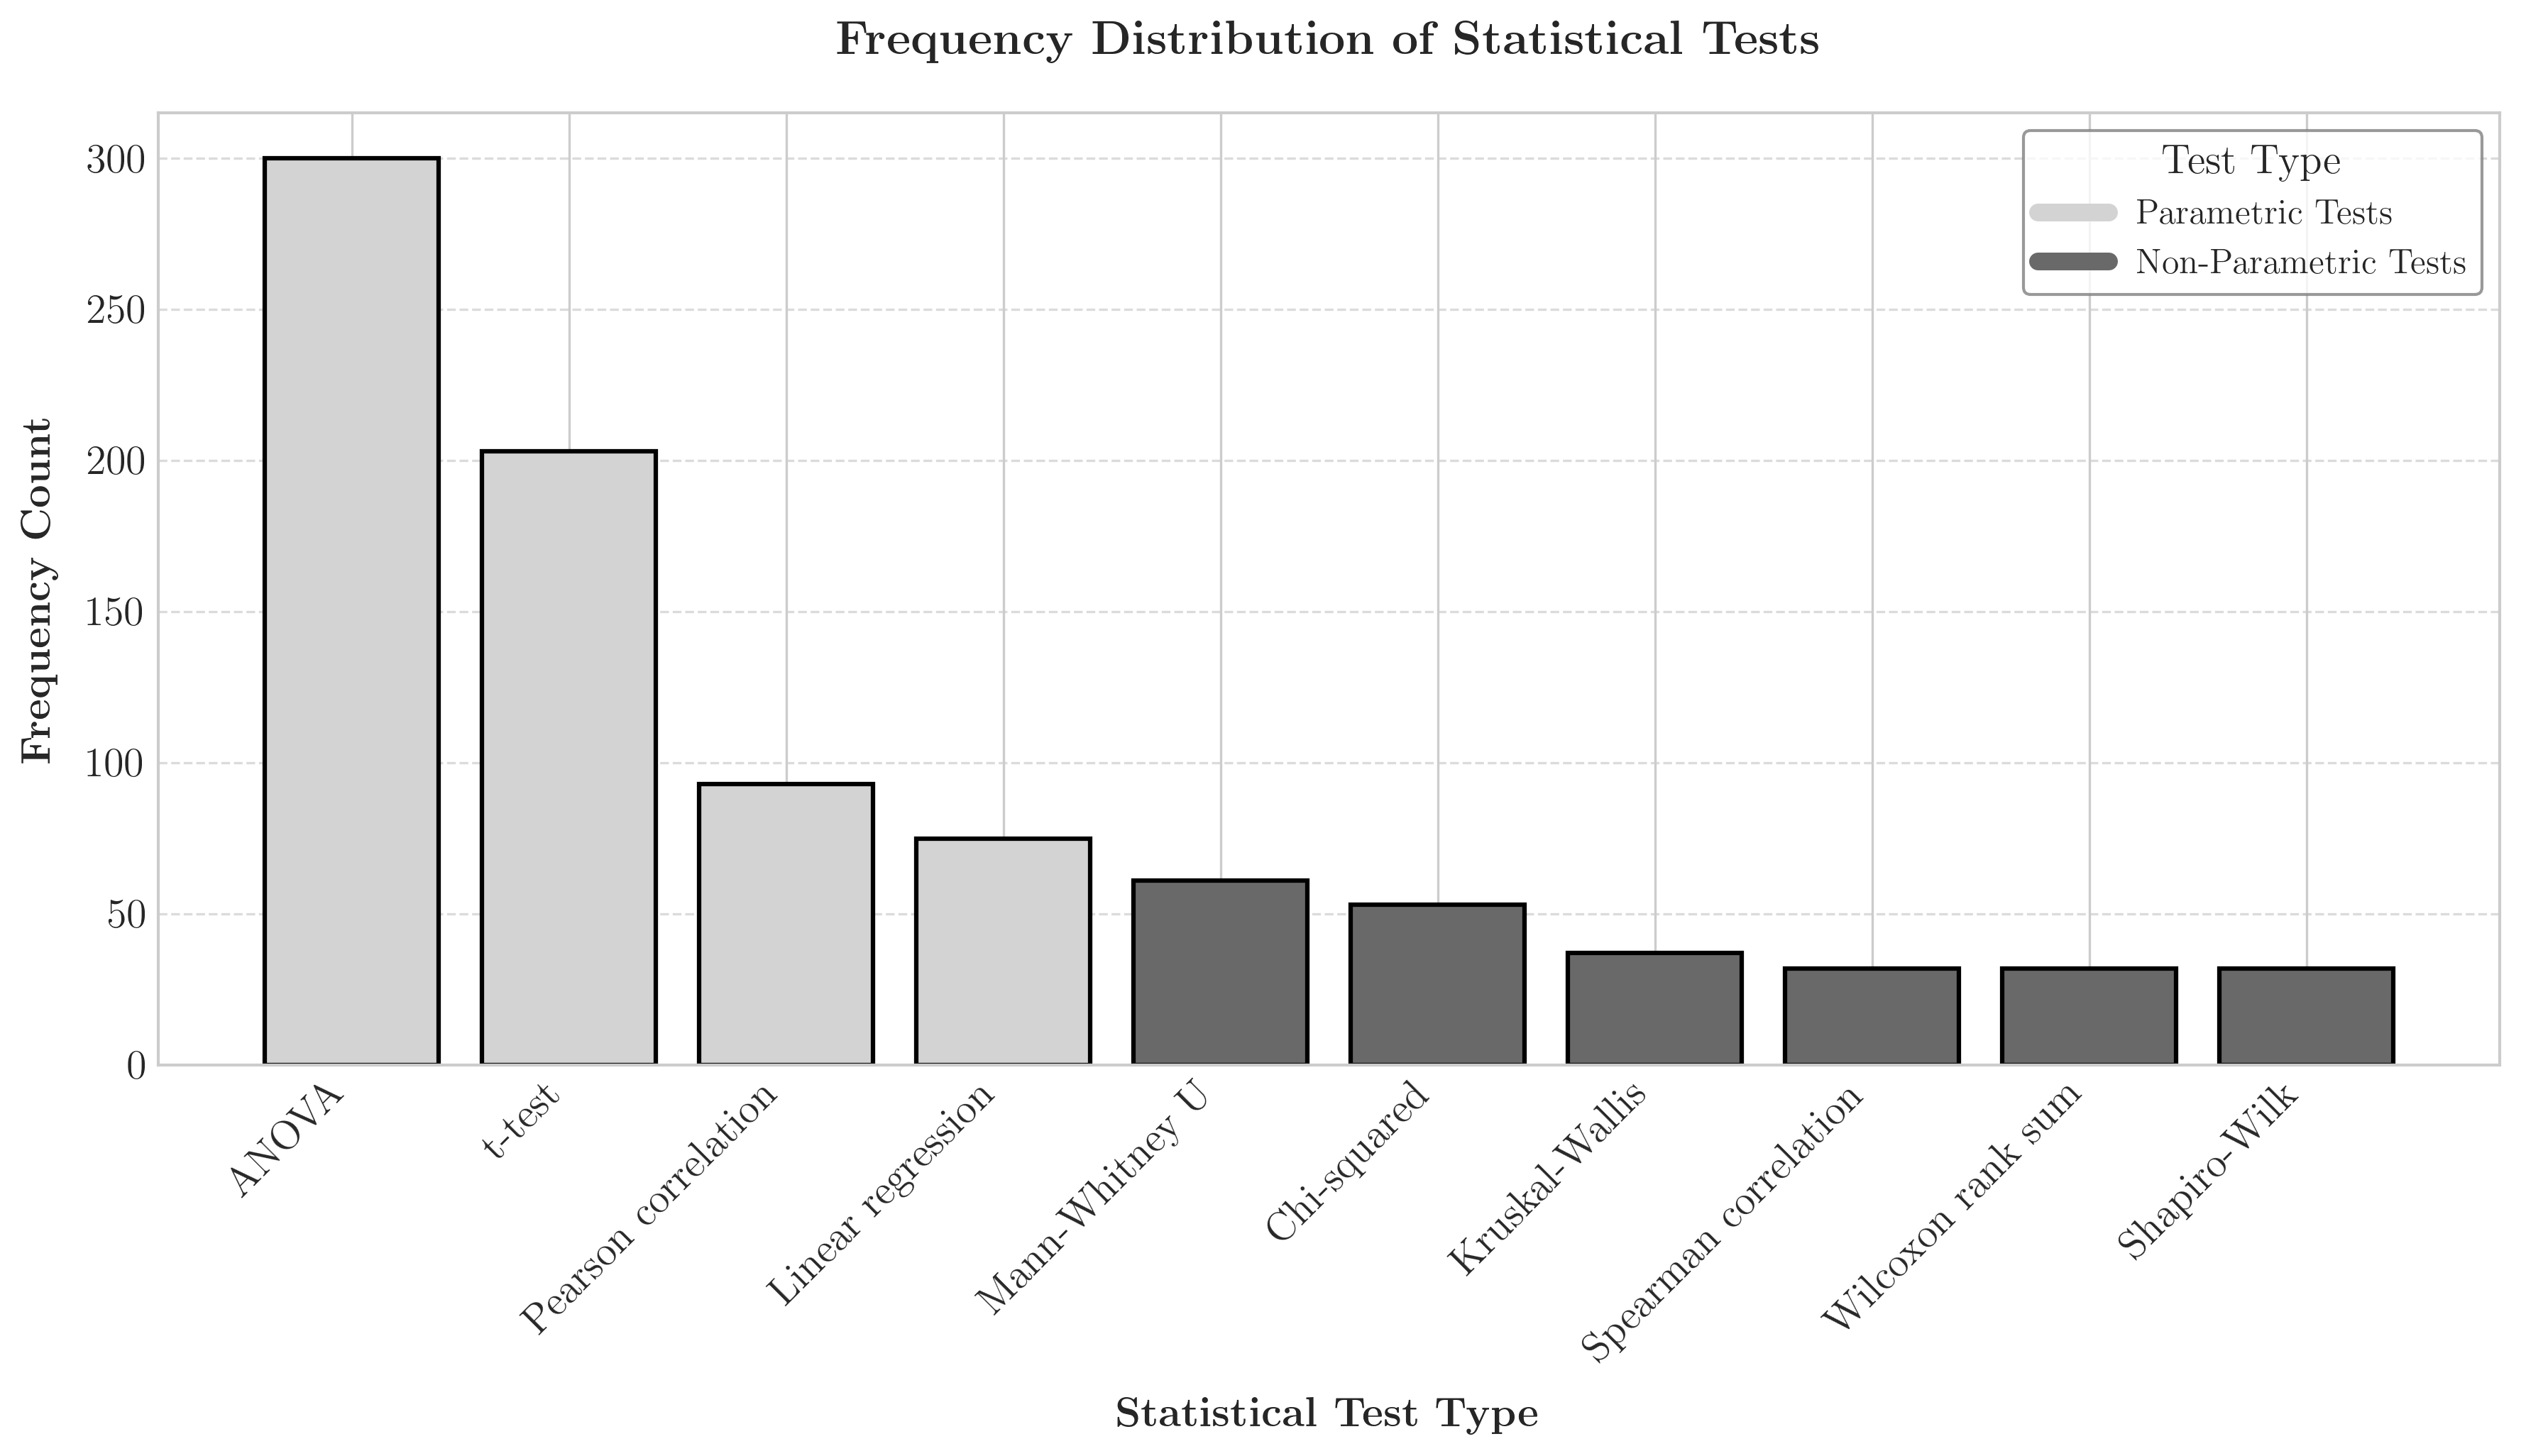

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,  # Enable LaTeX
    'font.family': 'serif',
    'text.latex.preamble': r'\usepackage{amsmath}',  # Ensure LaTeX packages are loaded
})

def filter_data(df, column, value=None, value_range=None):
    if value is not None:
        return df[df[column] == value]
    elif value_range is not None:
        return df[(df[column] >= value_range[0]) & (df[column] <= value_range[1])]
    else:
        return df

tests = data['statistical_analysis.statistical_test'].dropna()
unique_tests = tests.str.split(';').apply(lambda x: set([t.strip() for t in x]) if isinstance(x, list) else set())
flat_tests = [test for tests in unique_tests.dropna() for test in tests]
top_10 = pd.Series(flat_tests).value_counts().head(10)

# Define parametric and non-parametric tests for color mapping
parametric_tests = {'ANOVA', 't-test', 'Pearson correlation', 'Linear regression'}
non_parametric_tests = {'Mann-Whitney U', 'Kruskal-Wallis', 'Chi-squared', 
                        'Wilcoxon rank sum', 'Spearman correlation', 'Shapiro-Wilk'}

# Assign colors based on test type
colors = []
for test in top_10.index:
    if test in parametric_tests:
        colors.append('lightgray')  # Parametric tests
    elif test in non_parametric_tests:
        colors.append('dimgray')  # Non-parametric tests
    else:
        colors.append('gray')  # Default color for unknown types

# Create plot with higher DPI
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
bars = ax.bar(top_10.index, top_10.values, color=colors, edgecolor='black', linewidth=1.5)

# Customize with bold LaTeX labels
ax.set_title(r'\textbf{Frequency Distribution of Statistical Tests}', pad=20)
ax.set_xlabel(r'\textbf{Statistical Test Type}', labelpad=10)
ax.set_ylabel(r'\textbf{Frequency Count}', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
custom_legend = [
    plt.Line2D([0], [0], color='lightgray', lw=6, label='Parametric Tests'),  # Light Gray
    plt.Line2D([0], [0], color='dimgray', lw=6, label='Non-Parametric Tests'),  # Dark Gray
]

ax.legend(handles=custom_legend, title='Test Type', loc='upper right', fontsize=12, title_fontsize=14, frameon=True,  edgecolor='gray')

# Save and show the plot
plt.tight_layout()
plt.savefig('statistical_tests_distribution.pdf', format='pdf', bbox_inches='tight')
plt.show()

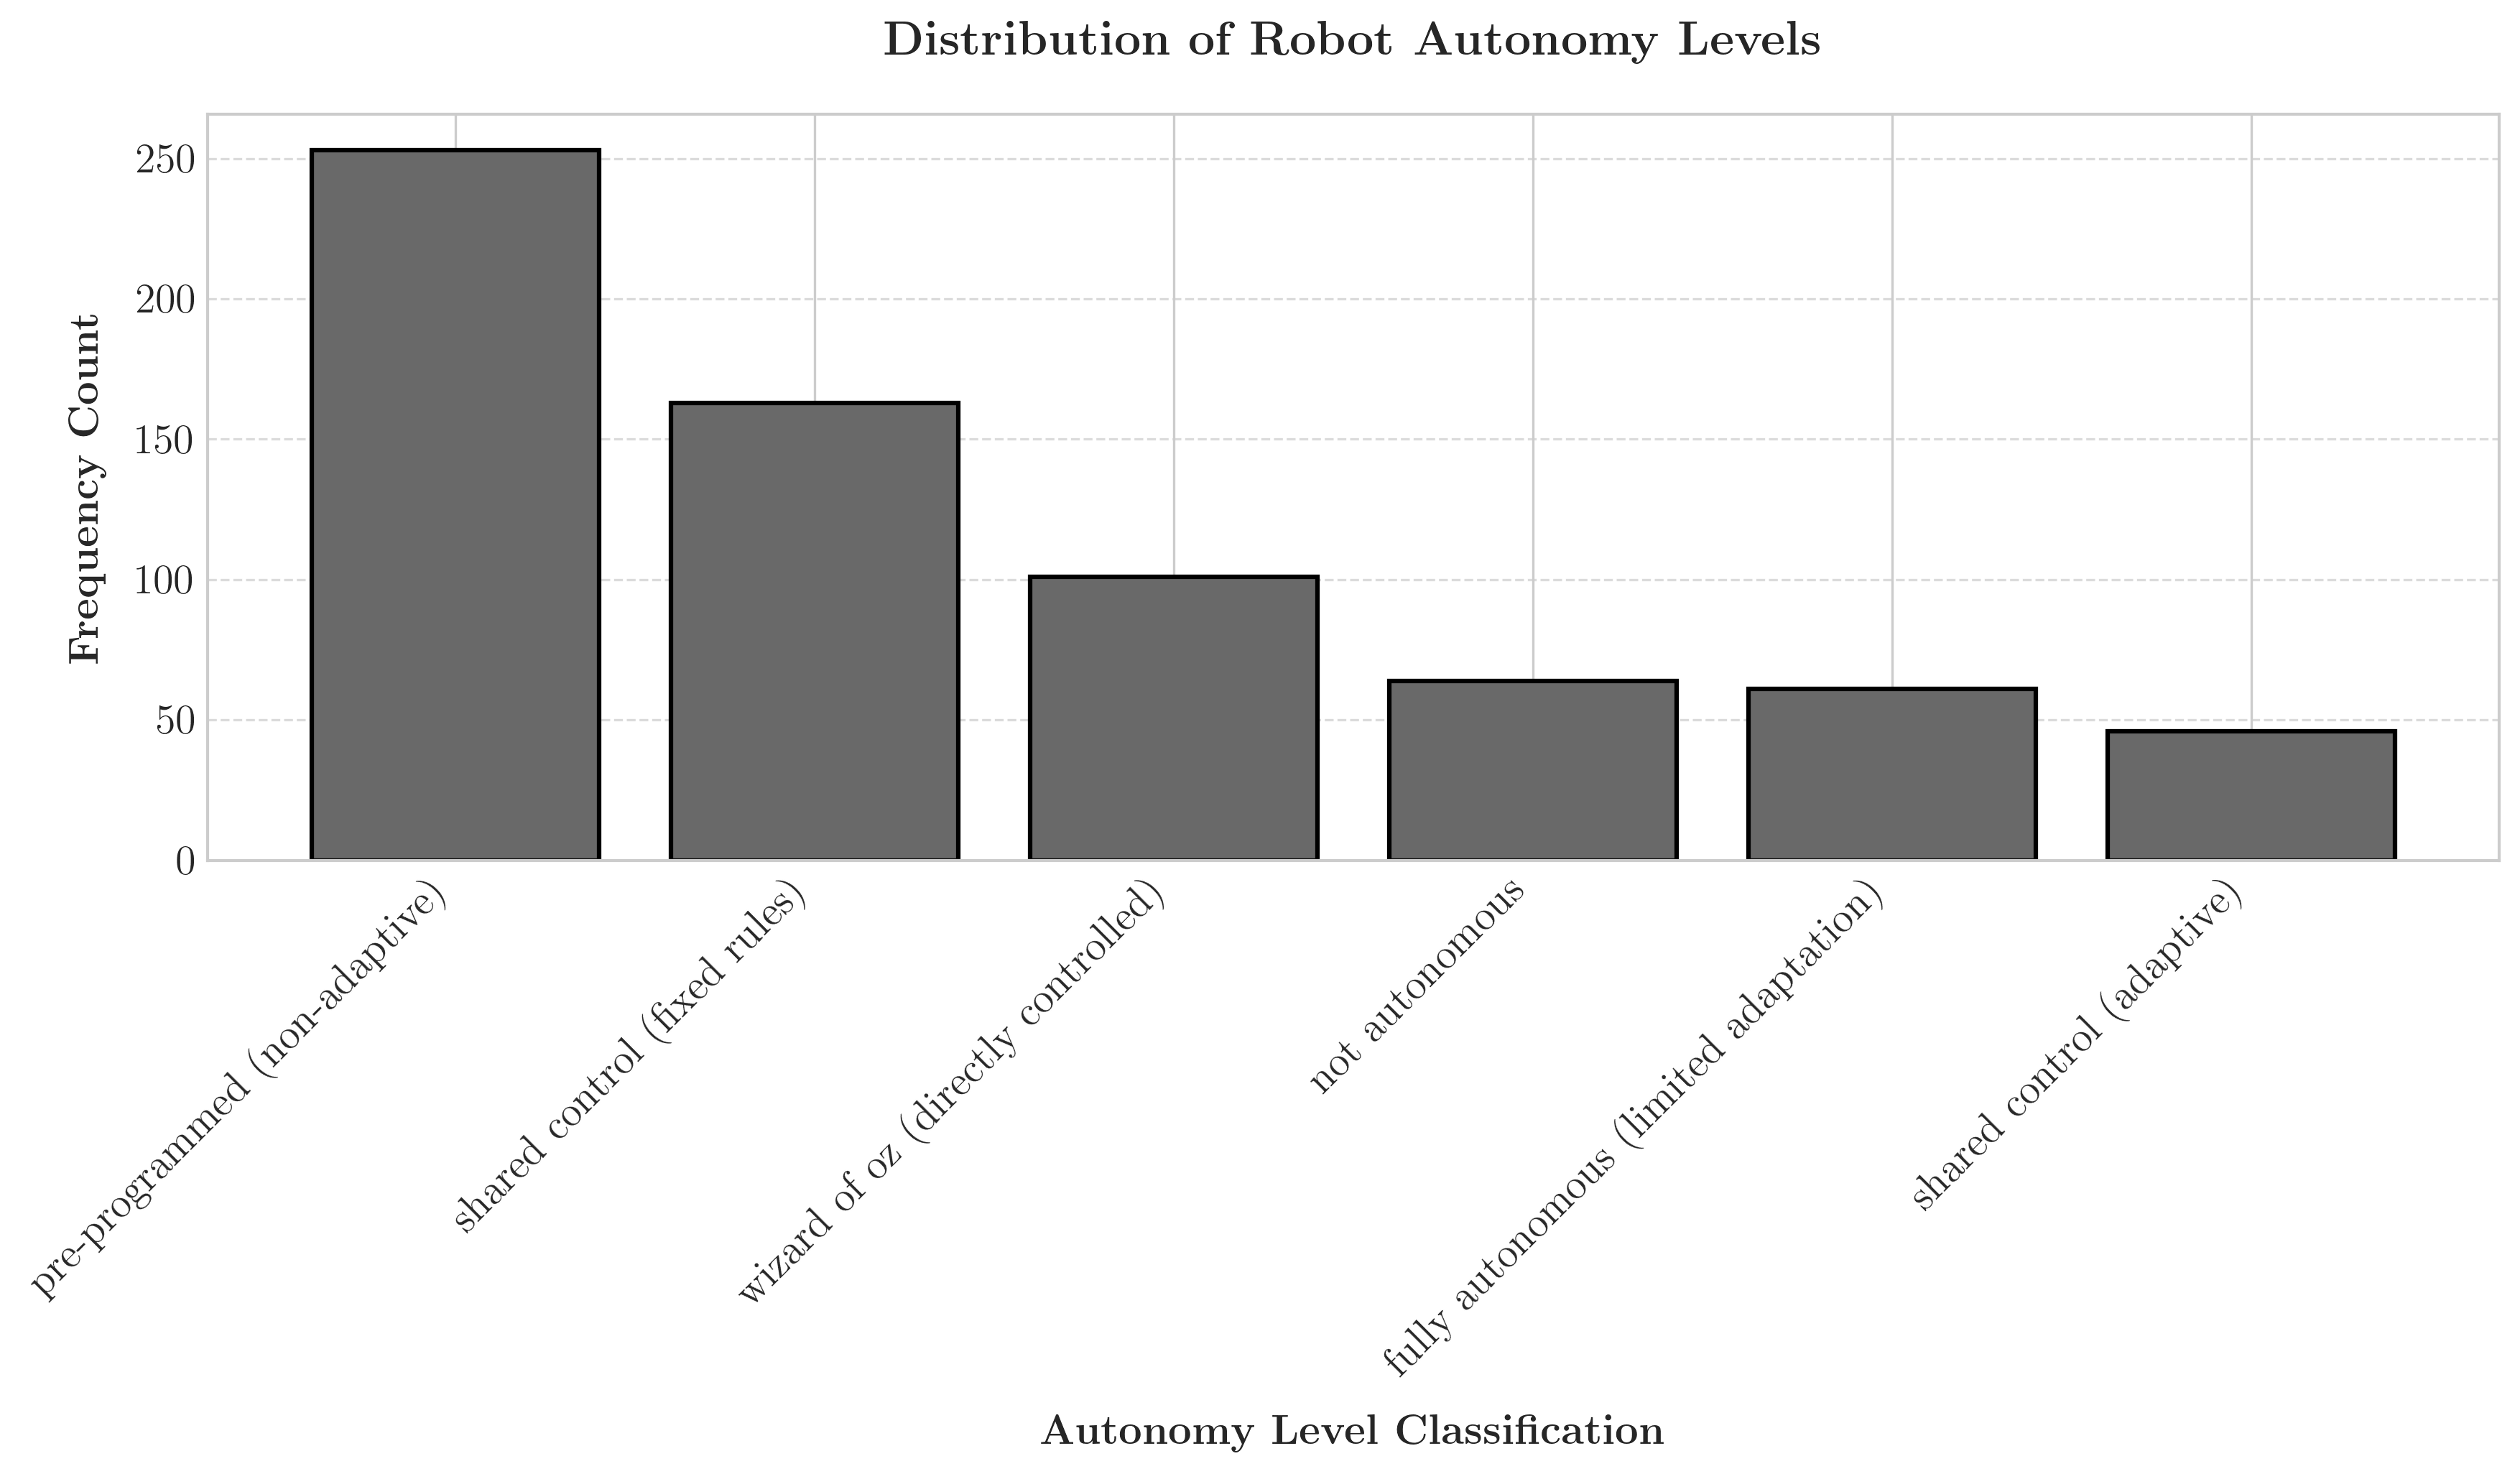

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,  # Enable LaTeX
    'font.family': 'serif',
    'text.latex.preamble': r'\usepackage{amsmath}',  # Ensure LaTeX packages are loaded
})

def filter_data(df, column, value=None, value_range=None):
    if value is not None:
        return df[df[column] == value]
    elif value_range is not None:
        return df[(df[column] >= value_range[0]) & (df[column] <= value_range[1])]
    else:
        return df

# Get autonomy levels and count their frequencies
autonomy_levels = data['robot_autonomy_level.classification'].dropna()
unique_levels = autonomy_levels.str.split(';').apply(lambda x: set([level.strip() for level in x]) if isinstance(x, list) else set())
flat_levels = [level for levels in unique_levels.dropna() for level in levels]
level_counts = pd.Series(flat_levels).value_counts()

# Create plot with higher DPI
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
bars = ax.bar(level_counts.index, level_counts.values, color='dimgrey', edgecolor='black', linewidth=1.5)

# Customize with bold LaTeX labels
ax.set_title(r'\textbf{Distribution of Robot Autonomy Levels}', pad=20)
ax.set_xlabel(r'\textbf{Autonomy Level Classification}', labelpad=10)
ax.set_ylabel(r'\textbf{Frequency Count}', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plt.tight_layout()
plt.savefig('robot_autonomy_distribution.pdf', format='pdf', bbox_inches='tight')
plt.show()

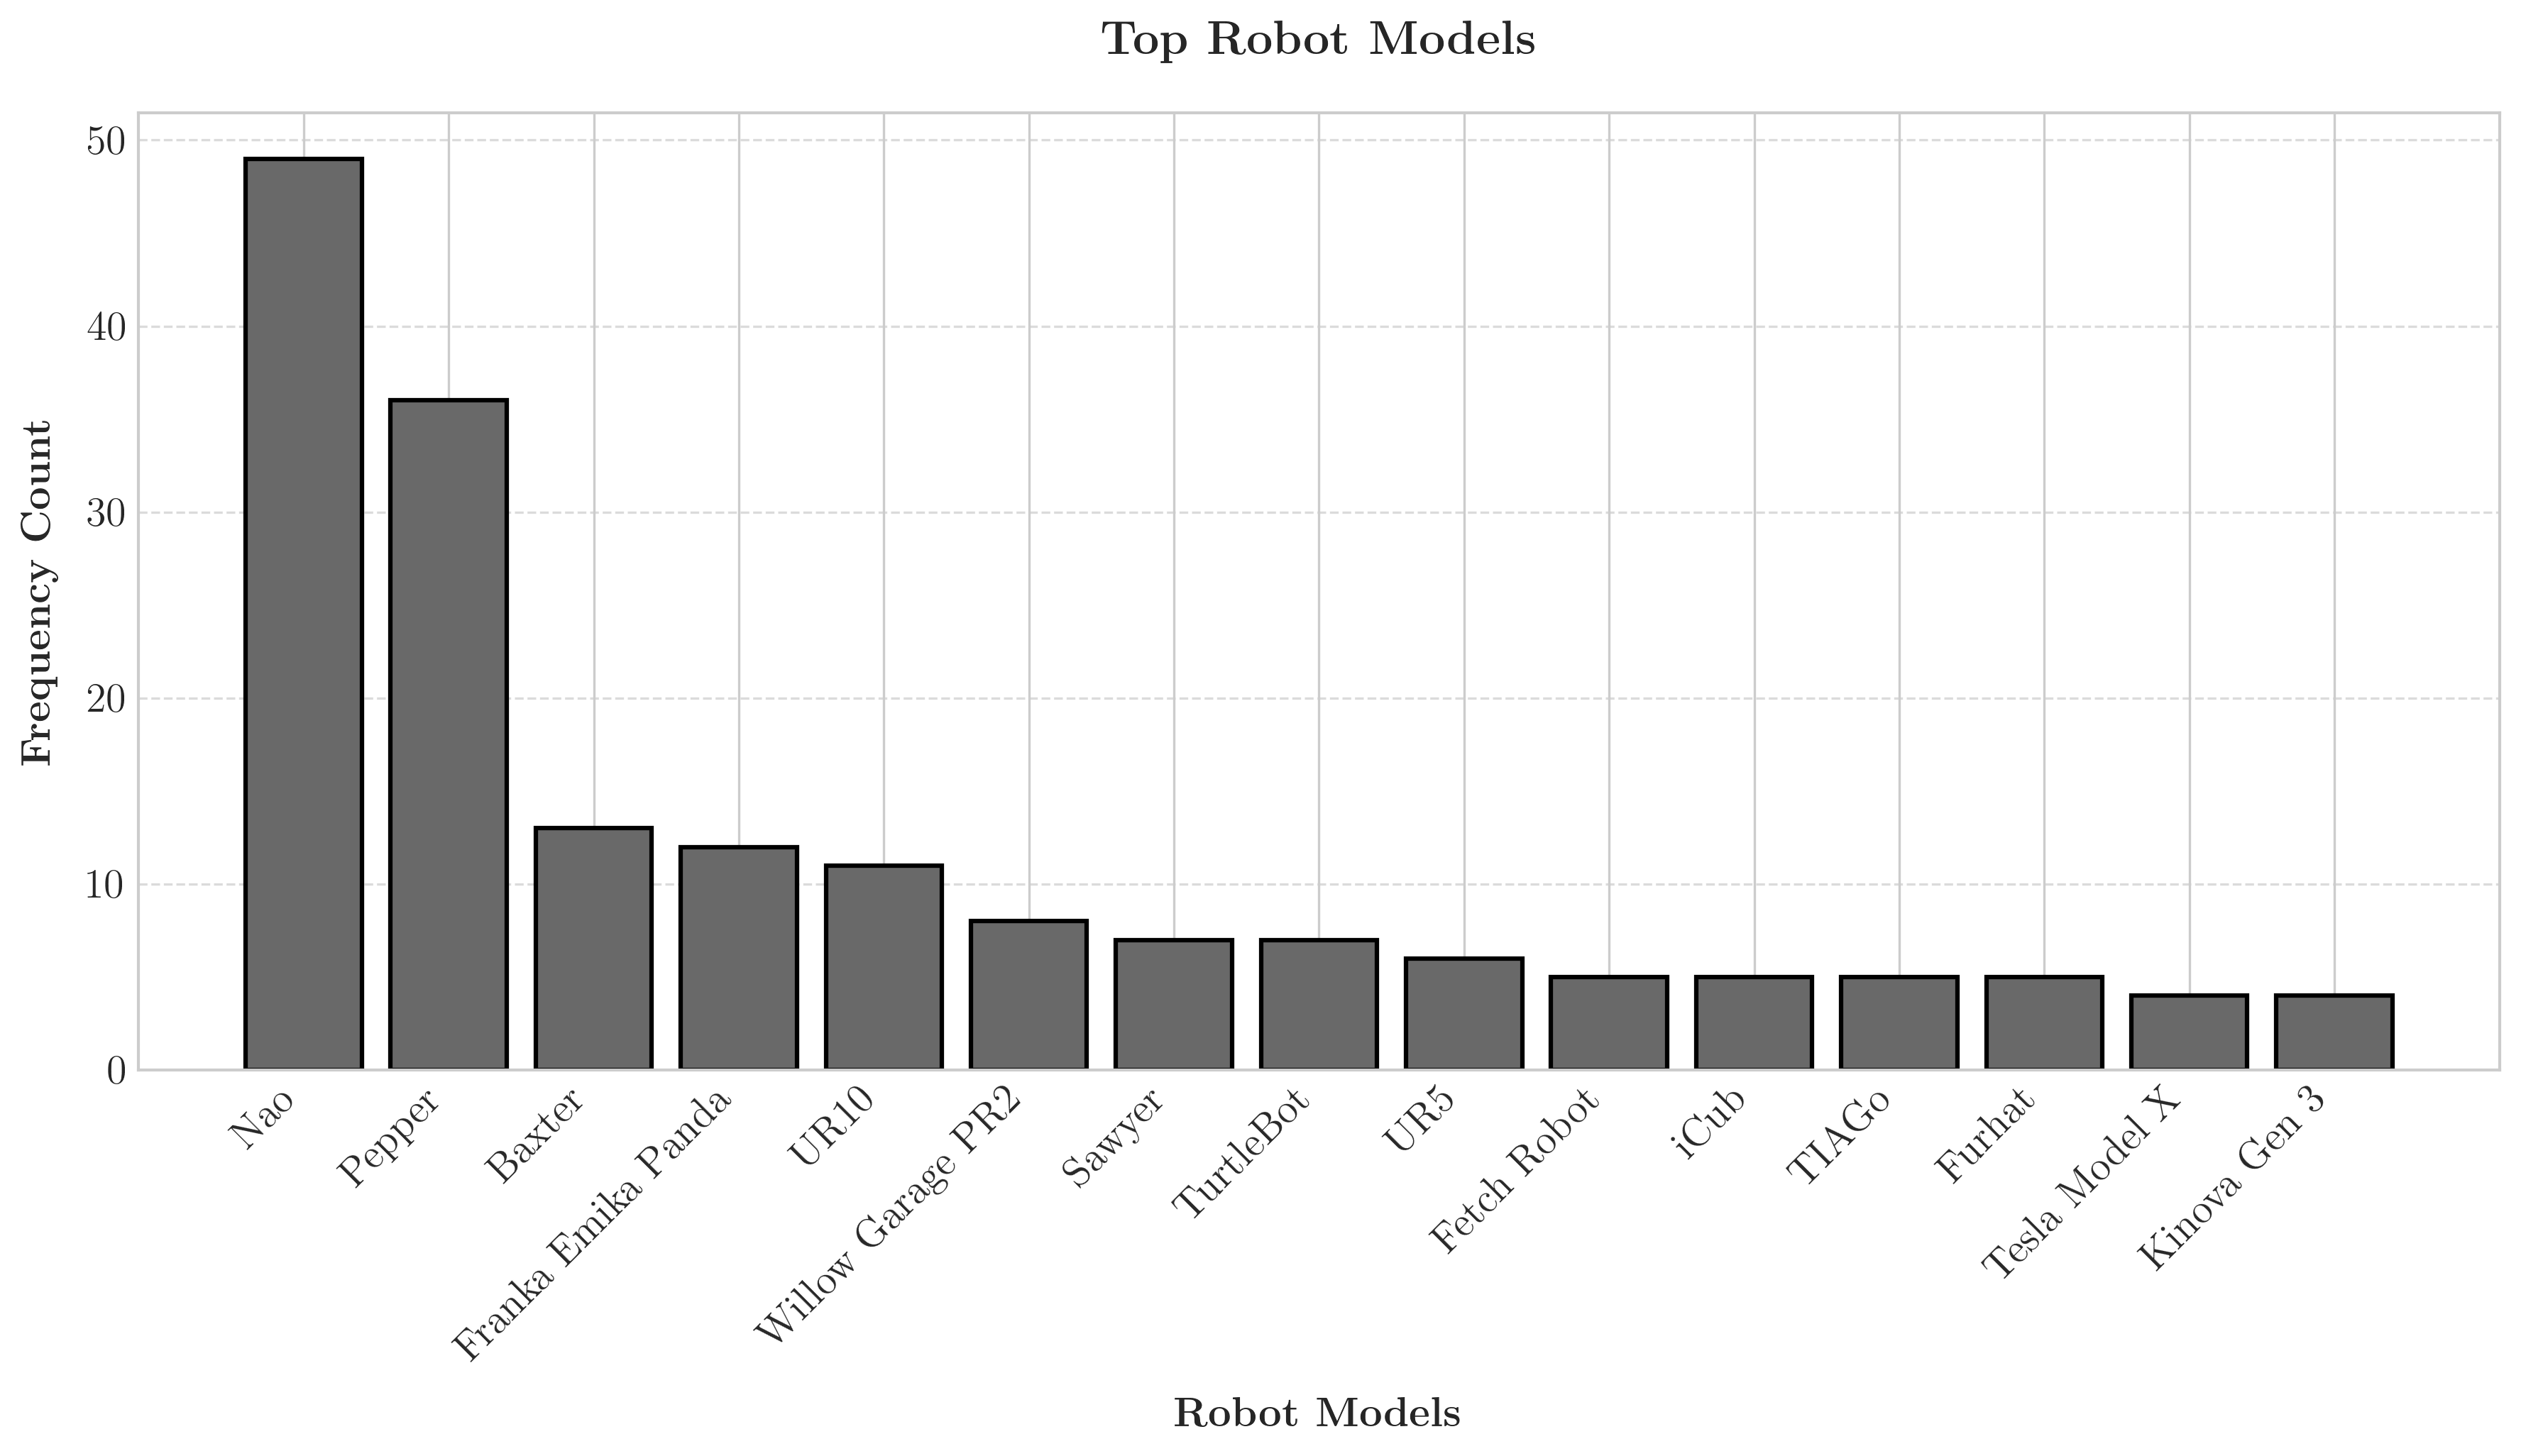

In [4]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,  # Enable LaTeX
    'font.family': 'serif',
    'text.latex.preamble': r'\usepackage{amsmath}',  # Ensure LaTeX packages are loaded
})


robot_models = data['robot_characteristics.robot_models'].dropna()
robot_models = robot_models[robot_models != 'Unspecified']  # Exclude 'Unspecified'

# Count top 10 robot models
top_10_robot_models = robot_models.value_counts().head(15)

# Define colors for robot models (optional customization for academic look)
colors = ['dimgray' for _ in range(len(top_10_robot_models))]

# Create plot with higher DPI
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
bars = ax.bar(top_10_robot_models.index, top_10_robot_models.values, color=colors, edgecolor='black', linewidth=1.5)

# Customize with bold LaTeX labels
ax.set_title(r'\textbf{Top Robot Models}', pad=20)
ax.set_xlabel(r'\textbf{Robot Models}', labelpad=10)
ax.set_ylabel(r'\textbf{Frequency Count}', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plt.tight_layout()
plt.savefig('top_robot_models_distribution.pdf', format='pdf', bbox_inches='tight')
plt.show()


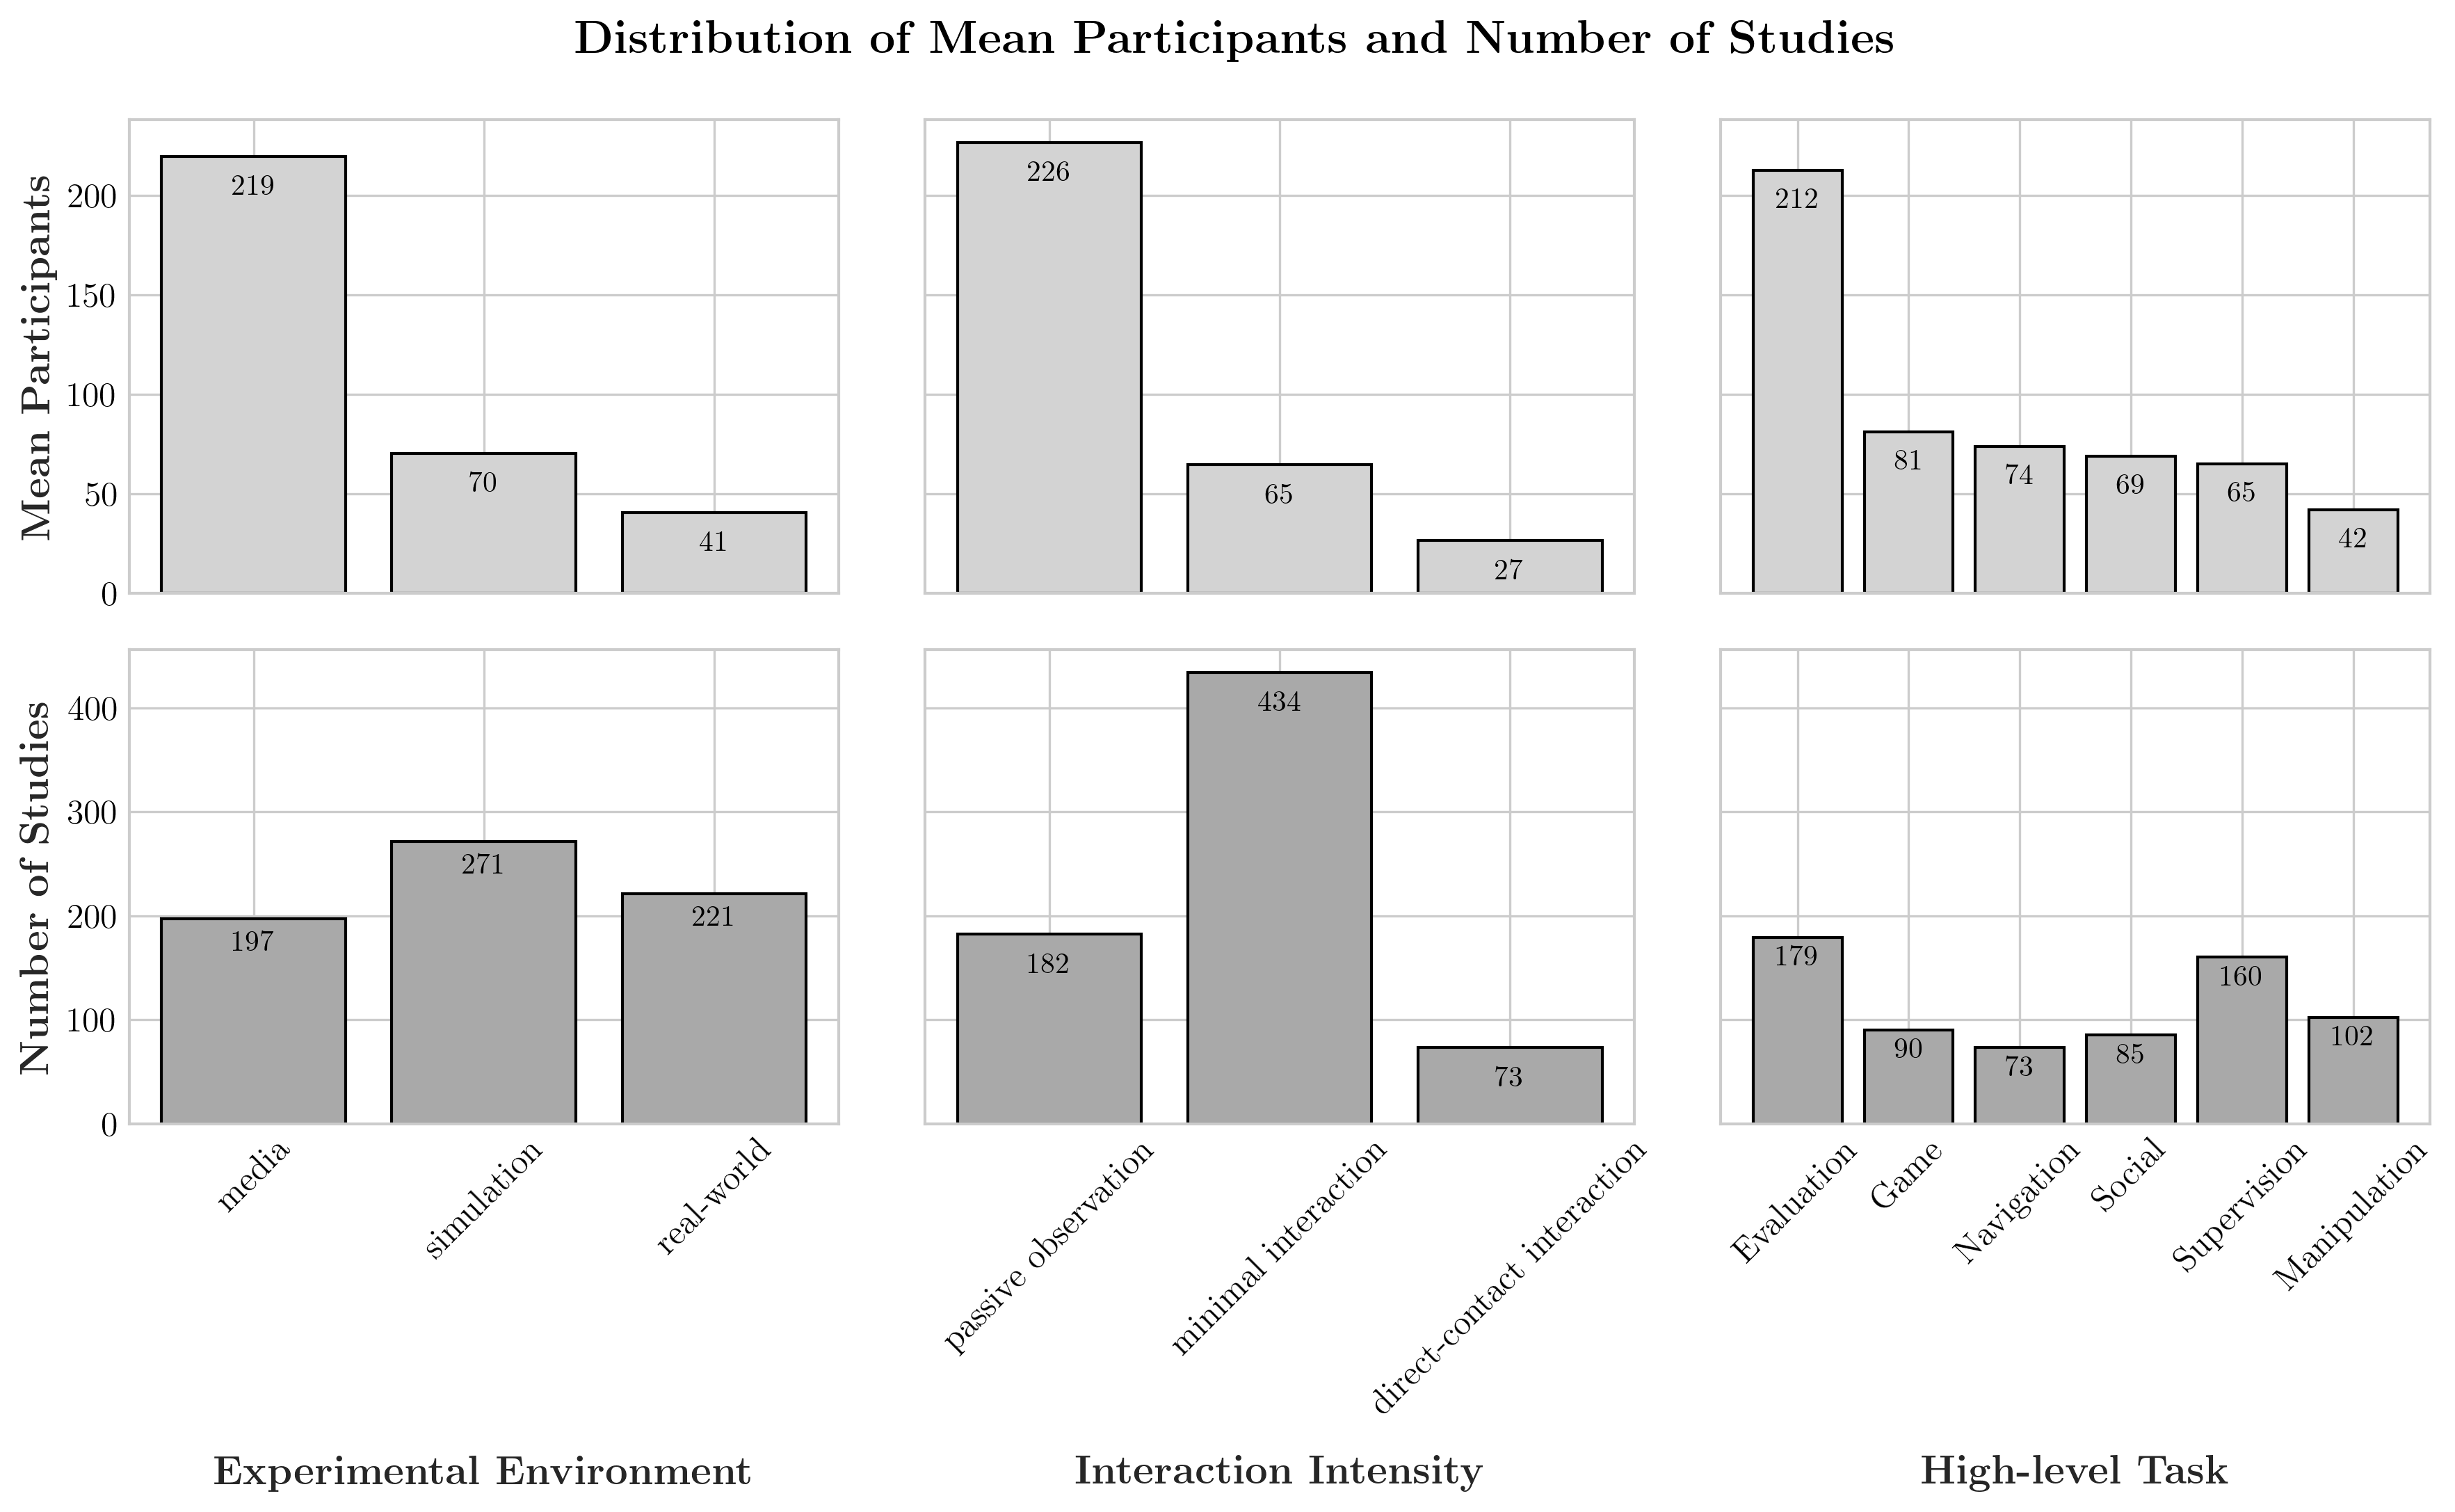

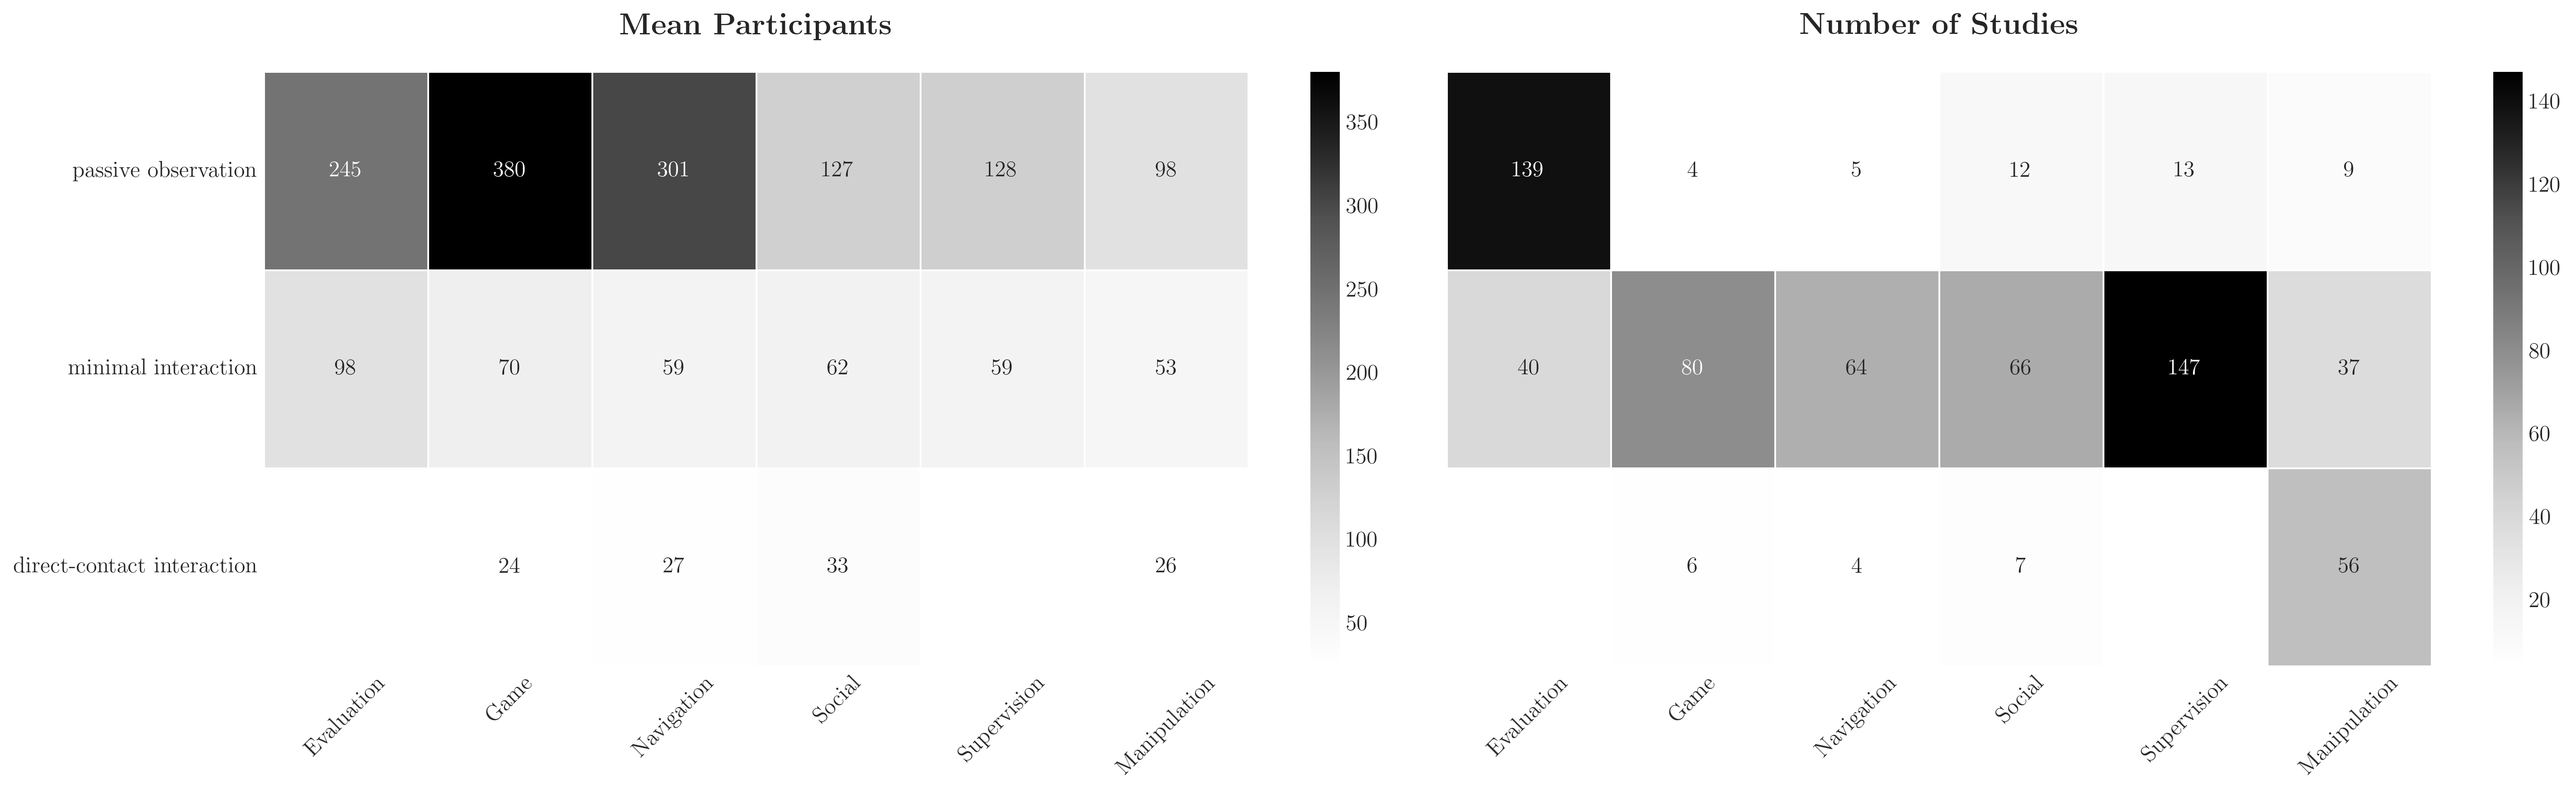

In [5]:
def create_barplot_grid(
    df: pd.DataFrame,
    data_column: str,
    x_columns: List[str],
    categories_as_rows: bool,
    sharex: bool,
    sharey: bool,
    x_labels: List[str],
    y_labels: List[str],
    title: str,
    annotate: bool = False,
    add_grid: bool = True,
):
    """
    Create a grid of bar plots for mean and count of categories in specified x_columns.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        data_column (str): Column to calculate the mean and count.
        x_columns (List[str]): List of columns representing categories.
        categories_as_rows (bool): Whether to arrange categories in rows (True) or columns (False).
        sharex (bool): Whether to share the x-axis within the same column.
        sharey (bool): Whether to share the y-axis within the same row.
        x_labels (List[str]): Labels for each column of subplots.
        y_labels (List[str]): Labels for each row of subplots.
        title (str): Title of the entire figure.
        annotate (bool): Whether to annotate the bar values on top.
    """
    # Determine subplot grid dimensions
    rows, cols = (3, 2) if categories_as_rows else (2, 3)
    
    # Setup figure and axes
    fig, axes = plt.subplots(
        rows, cols,
        figsize=(12, 8),
        sharex='col' if sharex else False,
        sharey='row' if sharey else False,
        dpi=300
    )

    # Ensure axes is a 2D array
    axes = np.array(axes).reshape(rows, cols)

    # Plot settings
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'text.usetex': True,
        'font.family': 'serif',
        'text.latex.preamble': r'\usepackage{amsmath}',
    })

    # Loop over x_columns and create plots
    for idx, x_column in enumerate(x_columns):
        # Calculate metrics
        category_means = df.groupby(x_column)[data_column].mean().sort_values(ascending=False)
        category_counts = df[x_column].value_counts().reindex(category_means.index, fill_value=0)

        # Determine subplot position
        row, col = (idx, 0) if categories_as_rows else (0, idx)

        # Plot mean on the left / below
        axes[row, col].bar(
            category_means.index,
            category_means.values,
            color='lightgray',
            edgecolor='black'
        )
        if annotate:
            for i, val in enumerate(category_means.values):
                axes[row, col].text(i, val - 0.04 * max(category_means.values), f'{val:.0f}', 
                                    ha='center', va='top', fontsize=10, color='black')
        axes[row, col].tick_params(axis='x', rotation=45, colors='black')
        axes[row, col].tick_params(axis='y', colors='black')
    
        # Plot count on the right / below
        if categories_as_rows:
            next_col = col + 1
            next_row = row
        else:
            next_row = row + 1
            next_col = col

        axes[next_row, next_col].bar(
            category_counts.index,
            category_counts.values,
            color='darkgray',
            edgecolor='black'
        )
        if annotate:
            for i, val in enumerate(category_counts.values):
                axes[next_row, next_col].text(i, val - 0.04 * max(category_counts.values), f'{val:.0f}', 
                                              ha='center', va='top', fontsize=10, color='black')
        axes[next_row, next_col].tick_params(axis='x', rotation=45, colors='black')
        axes[next_row, next_col].tick_params(axis='y', colors='black')
        if not add_grid:
            axes[row, col].grid(False)
            axes[next_row, next_col].grid(False)

    # Set shared labels
    if x_labels:
        for ax, label in zip(axes[-1, :], x_labels):
            # ax.set_xlabel(label, fontsize=14, fontweight='bold', color='black')
            ax.set_xlabel(rf'\textbf{{{label}}}')
            ax.xaxis.set_label_coords(0.5, -0.7)  # Align all x-labels at the same height


    if y_labels:
        for ax, label in zip(axes[:, 0], y_labels):
            # ax.set_ylabel(label, fontsize=14, fontweight='bold', color='black')
            ax.set_ylabel(rf'\textbf{{{label}}}')

    # Add overall title
    fig.suptitle(rf'\textbf{{{title}}}', fontsize=16, fontweight='bold', color='black', y=0.95)

    # Adjust layout and display
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('distribution_of_mean_participants_and_studies.pdf', format='pdf', bbox_inches='tight')
    plt.show()


def plot_heatmaps(df, x_column, y_column, data_column,
                  title, side_by_side, convert_count_to_percentage):
    """Create two heatmaps: mean participants and number of studies."""
    # Aggregating the data for mean participants
    mean_data = df.groupby([x_column, y_column])[data_column].mean().reset_index()
    count_data = df.groupby([x_column, y_column])[data_column].size().reset_index(name='count')

    # Sorting x and y categories independently by mean participants
    sorted_x = df.groupby(x_column)[data_column].mean().sort_values(ascending=False).index
    sorted_y = df.groupby(y_column)[data_column].mean().sort_values(ascending=False).index

    # Pivot tables for heatmaps
    mean_pivot = mean_data.pivot_table(index=y_column, columns=x_column, values=data_column, aggfunc='mean').loc[sorted_y, sorted_x]
    count_pivot = count_data.pivot_table(index=y_column, columns=x_column, values='count', aggfunc='sum').loc[sorted_y, sorted_x]

    if convert_count_to_percentage:
        total_studies = count_pivot.sum().sum()
        count_pivot = (count_pivot / total_studies * 100).round()

    # Set plot style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'text.usetex': True,
        'font.family': 'serif',
        'text.latex.preamble': r'\usepackage{amsmath}',
    })

    # Set up figure layout
    if side_by_side:
        fig, axes = plt.subplots(1, 2, figsize=(20, 6), dpi=300)
    else:
        fig, axes = plt.subplots(2, 1, figsize=(20, 8), dpi=300)

    # Heatmap for mean participants
    sns.heatmap(
        mean_pivot,
        cmap='Greys',
        annot=True,
        fmt='.0f',
        linewidths=0.5,
        cbar_kws=None if side_by_side else {'label': r'\textbf{Mean Participants}'},
        ax=axes[0] if side_by_side else axes[0]
    )
    if side_by_side:
        axes[0].set_title(rf'\textbf{{Mean Participants}}', pad=20)

    axes[0].set_xlabel(None)
    axes[0].set_ylabel(None)

    axes[0].tick_params(axis='x', rotation=45)
    axes[0].tick_params(axis='y', rotation=0)

    # Heatmap for count of studies
    sns.heatmap(
        count_pivot,
        cmap='Greys',
        annot=True,
        fmt='.0f',
        linewidths=0.5,
        cbar_kws=None if side_by_side else {'label': r'\textbf{Percentage of Studies}' if convert_count_to_percentage else r'\textbf{Number of Studies}'},
        ax=axes[1] if side_by_side else axes[1]
    )
    if side_by_side:
        axes[1].set_title(r'\textbf{Percentage of Studies}' if convert_count_to_percentage else r'\textbf{Number of Studies}', pad=20)

    axes[1].set_xlabel(None)
    axes[1].set_ylabel(None)
    axes[1].set_yticklabels("")

    axes[0].grid(False)
    axes[1].grid(False)


    axes[1].tick_params(axis='x', rotation=45)
    # axes[1].tick_params(axis='y', rotation=0)

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f"heatmap_{title.replace(' ', '_').lower()}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

create_barplot_grid(
    df=data,
    data_column='basic_study_info.valid_participants',
    x_columns=[
        'immersiveness.classification', 
        'interaction_intensity.classification',
        'task_classification.high_level_task'
        ],
    categories_as_rows=False,
    sharex=True,
    sharey=True,
    x_labels=['Experimental Environment', 'Interaction Intensity', 'High-level Task'],
    y_labels=['Mean Participants', 'Number of Studies'],
    title='Distribution of Mean Participants and Number of Studies',
    annotate=True,
    add_grid=True
)

plot_heatmaps(
    df=data,
    x_column='task_classification.high_level_task',
    y_column='interaction_intensity.classification',
    data_column='basic_study_info.valid_participants',
    title='Heatmaps of HRI Studies',
    side_by_side=True,
    convert_count_to_percentage=False,
)

In [6]:
def create_latex_color_cell(value, background_color, text_color, is_empty=False):
    """Create a LaTeX cell with background color and text color"""
    if is_empty or pd.isna(value) or value == 0:
        return "---"
    bg_color = background_color.replace('#', '')
    return f"\\cellcolor[HTML]{{{bg_color}}}\\textcolor{{{text_color}}}{{{value:.0f}}}"

def custom_latex_formatter(data_mean, data_count, cmap='Greys'):
    """Format DataFrames with LaTeX color commands for both mean and count data"""
    cmap = plt.get_cmap(cmap)
    
    # Create separate normalizations for mean and count
    norm_mean = plt.Normalize(data_mean.min().min(), data_mean.max().max())
    norm_count = plt.Normalize(data_count.min().min(), data_count.max().max())
    
    styled_mean = data_mean.copy()
    styled_count = data_count.copy()
    
    def style_cell(val, norm):
        if pd.isna(val) or val == 0:
            return create_latex_color_cell(0, "#FFFFFF", "black", is_empty=True)
        
        rgb = cmap(norm(val))
        bg_color = rgb2hex(rgb[:3])
        luminance = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
        text_color = 'white' if luminance < 0.6 else 'black'
        
        return create_latex_color_cell(val, bg_color, text_color)
    
    # Apply styling to both tables
    for col in styled_mean.columns:
        styled_mean[col] = styled_mean[col].apply(lambda x: style_cell(x, norm_mean))
        styled_count[col] = styled_count[col].apply(lambda x: style_cell(x, norm_count))
    
    return styled_mean, styled_count

def generate_combined_latex_table(df, x_column, y_column, data_column, caption, label):
    """Generate a combined LaTeX table with both mean and count data"""
    # Name mappings
    row_name_mapping = {
        'direct-contact interaction': 'Direct',
        'minimal interaction': 'Minimal',
        'passive observation': 'Passive'
    }
    
    # Apply row name mapping to the DataFrame copy
    df = df.copy()
    df[y_column] = df[y_column].map(row_name_mapping)
    
    # Prepare the data
    mean_data = df.groupby([y_column, x_column])[data_column].mean().reset_index()
    count_data = df.groupby([y_column, x_column]).size().reset_index(name='count')
    
    # Define column and row order
    column_order = ['Evaluation', 'Game', 'Navigation', 'Social', 'Supervision', 'Manipulation']
    row_order = ['Passive', 'Minimal', 'Direct']  # Enforced row order
    
    # Create pivot tables
    mean_pivot = mean_data.pivot(index=y_column, columns=x_column, values=data_column)
    count_pivot = count_data.pivot(index=y_column, columns=x_column, values='count')
    
    # Reorder columns and rows
    mean_pivot = mean_pivot[column_order]
    count_pivot = count_pivot[column_order]
    # mean_pivot = mean_pivot.reindex(row_order)
    # count_pivot = count_pivot.reindex(row_order)
    
    # Apply color formatting
    styled_mean, styled_count = custom_latex_formatter(mean_pivot, count_pivot)
    
    # Column abbreviations
    col_abbrev = {
        'Evaluation': 'Eval',
        'Game': 'Game',
        'Navigation': 'Nav',
        'Social': 'Social',
        'Supervision': 'Sup',
        'Manipulation': 'Manip'
    }
    
    col_headers = ' & '.join([f"\\textbf{{{col_abbrev[col]}}}" for col in column_order])
    
    # Create table content
    table_content = []
    
    # Add mean participants section
    table_content.append("\\multicolumn{7}{c}{\\textbf{Mean Participants}} \\\\")
    table_content.append("\\midrule")
    
    for idx in row_order:
        if idx in styled_mean.index:
            table_content.append(f"{idx} & {' & '.join(styled_mean.loc[idx].values)} \\\\")
    
    # Add count section
    table_content.append("\\midrule")
    table_content.append("\\multicolumn{7}{c}{\\textbf{Number of Studies}} \\\\")
    table_content.append("\\midrule")
    
    for idx in row_order:
        if idx in styled_count.index:
            table_content.append(f"{idx} & {' & '.join(styled_count.loc[idx].values)} \\\\")
    
    # Generate complete LaTeX table
    latex_table = f"""\\begin{{table}}[!t]
\\setlength{{\\tabcolsep}}{{12pt}}
\\begin{{tabular*}}{{\\textwidth}}{{@{{\\extracolsep{{\\fill}}}}l|{'c|' * (len(column_order)-1)}c}}
\\toprule
\\textbf{{Type}} & {col_headers} \\\\
\\midrule
{chr(10).join(table_content)}
\\bottomrule
\\end{{tabular*}}
\\caption{{{caption}}}
\\label{{{label}}}
\\vspace{{-1cm}}
\\end{{table}}"""

    return latex_table

def plot_heatmaps_with_latex(df, x_column, y_column, data_column,
                            title, side_by_side=True, convert_count_to_percentage=False):
    """Create heatmaps and corresponding LaTeX table"""
    caption = (f"Distribution of Valid Participants and study counts across High Level Task domains ")
    label = "tab:classification"
    
    latex_table = generate_combined_latex_table(
        df=df,
        x_column=x_column,
        y_column=y_column,
        data_column=data_column,
        caption=caption,
        label=label
    )
    
    # Print the LaTeX code
    print("\nGenerated LaTeX Table:\n")
    print(latex_table)
    
    return latex_table


# Example usage:
if __name__ == "__main__":
    latex_table = plot_heatmaps_with_latex(
        df=data,
        x_column='task_classification.high_level_task',
        y_column='interaction_intensity.classification',
        data_column='basic_study_info.valid_participants',
        title='Distribution of HRI Studies'
    )


Generated LaTeX Table:

\begin{table}[!t]
\setlength{\tabcolsep}{12pt}
\begin{tabular*}{\textwidth}{@{\extracolsep{\fill}}l|c|c|c|c|c|c}
\toprule
\textbf{Type} & \textbf{Eval} & \textbf{Game} & \textbf{Nav} & \textbf{Social} & \textbf{Sup} & \textbf{Manip} \\
\midrule
\multicolumn{7}{c}{\textbf{Mean Participants}} \\
\midrule
Passive & \cellcolor[HTML]{737373}\textcolor{white}{245} & \cellcolor[HTML]{000000}\textcolor{white}{380} & \cellcolor[HTML]{474747}\textcolor{white}{301} & \cellcolor[HTML]{d0d0d0}\textcolor{black}{127} & \cellcolor[HTML]{cfcfcf}\textcolor{black}{128} & \cellcolor[HTML]{e1e1e1}\textcolor{black}{98} \\
Minimal & \cellcolor[HTML]{e1e1e1}\textcolor{black}{98} & \cellcolor[HTML]{efefef}\textcolor{black}{70} & \cellcolor[HTML]{f3f3f3}\textcolor{black}{59} & \cellcolor[HTML]{f2f2f2}\textcolor{black}{62} & \cellcolor[HTML]{f3f3f3}\textcolor{black}{59} & \cellcolor[HTML]{f6f6f6}\textcolor{black}{53} \\
Direct & --- & \cellcolor[HTML]{ffffff}\textcolor{black}{24} & \cell

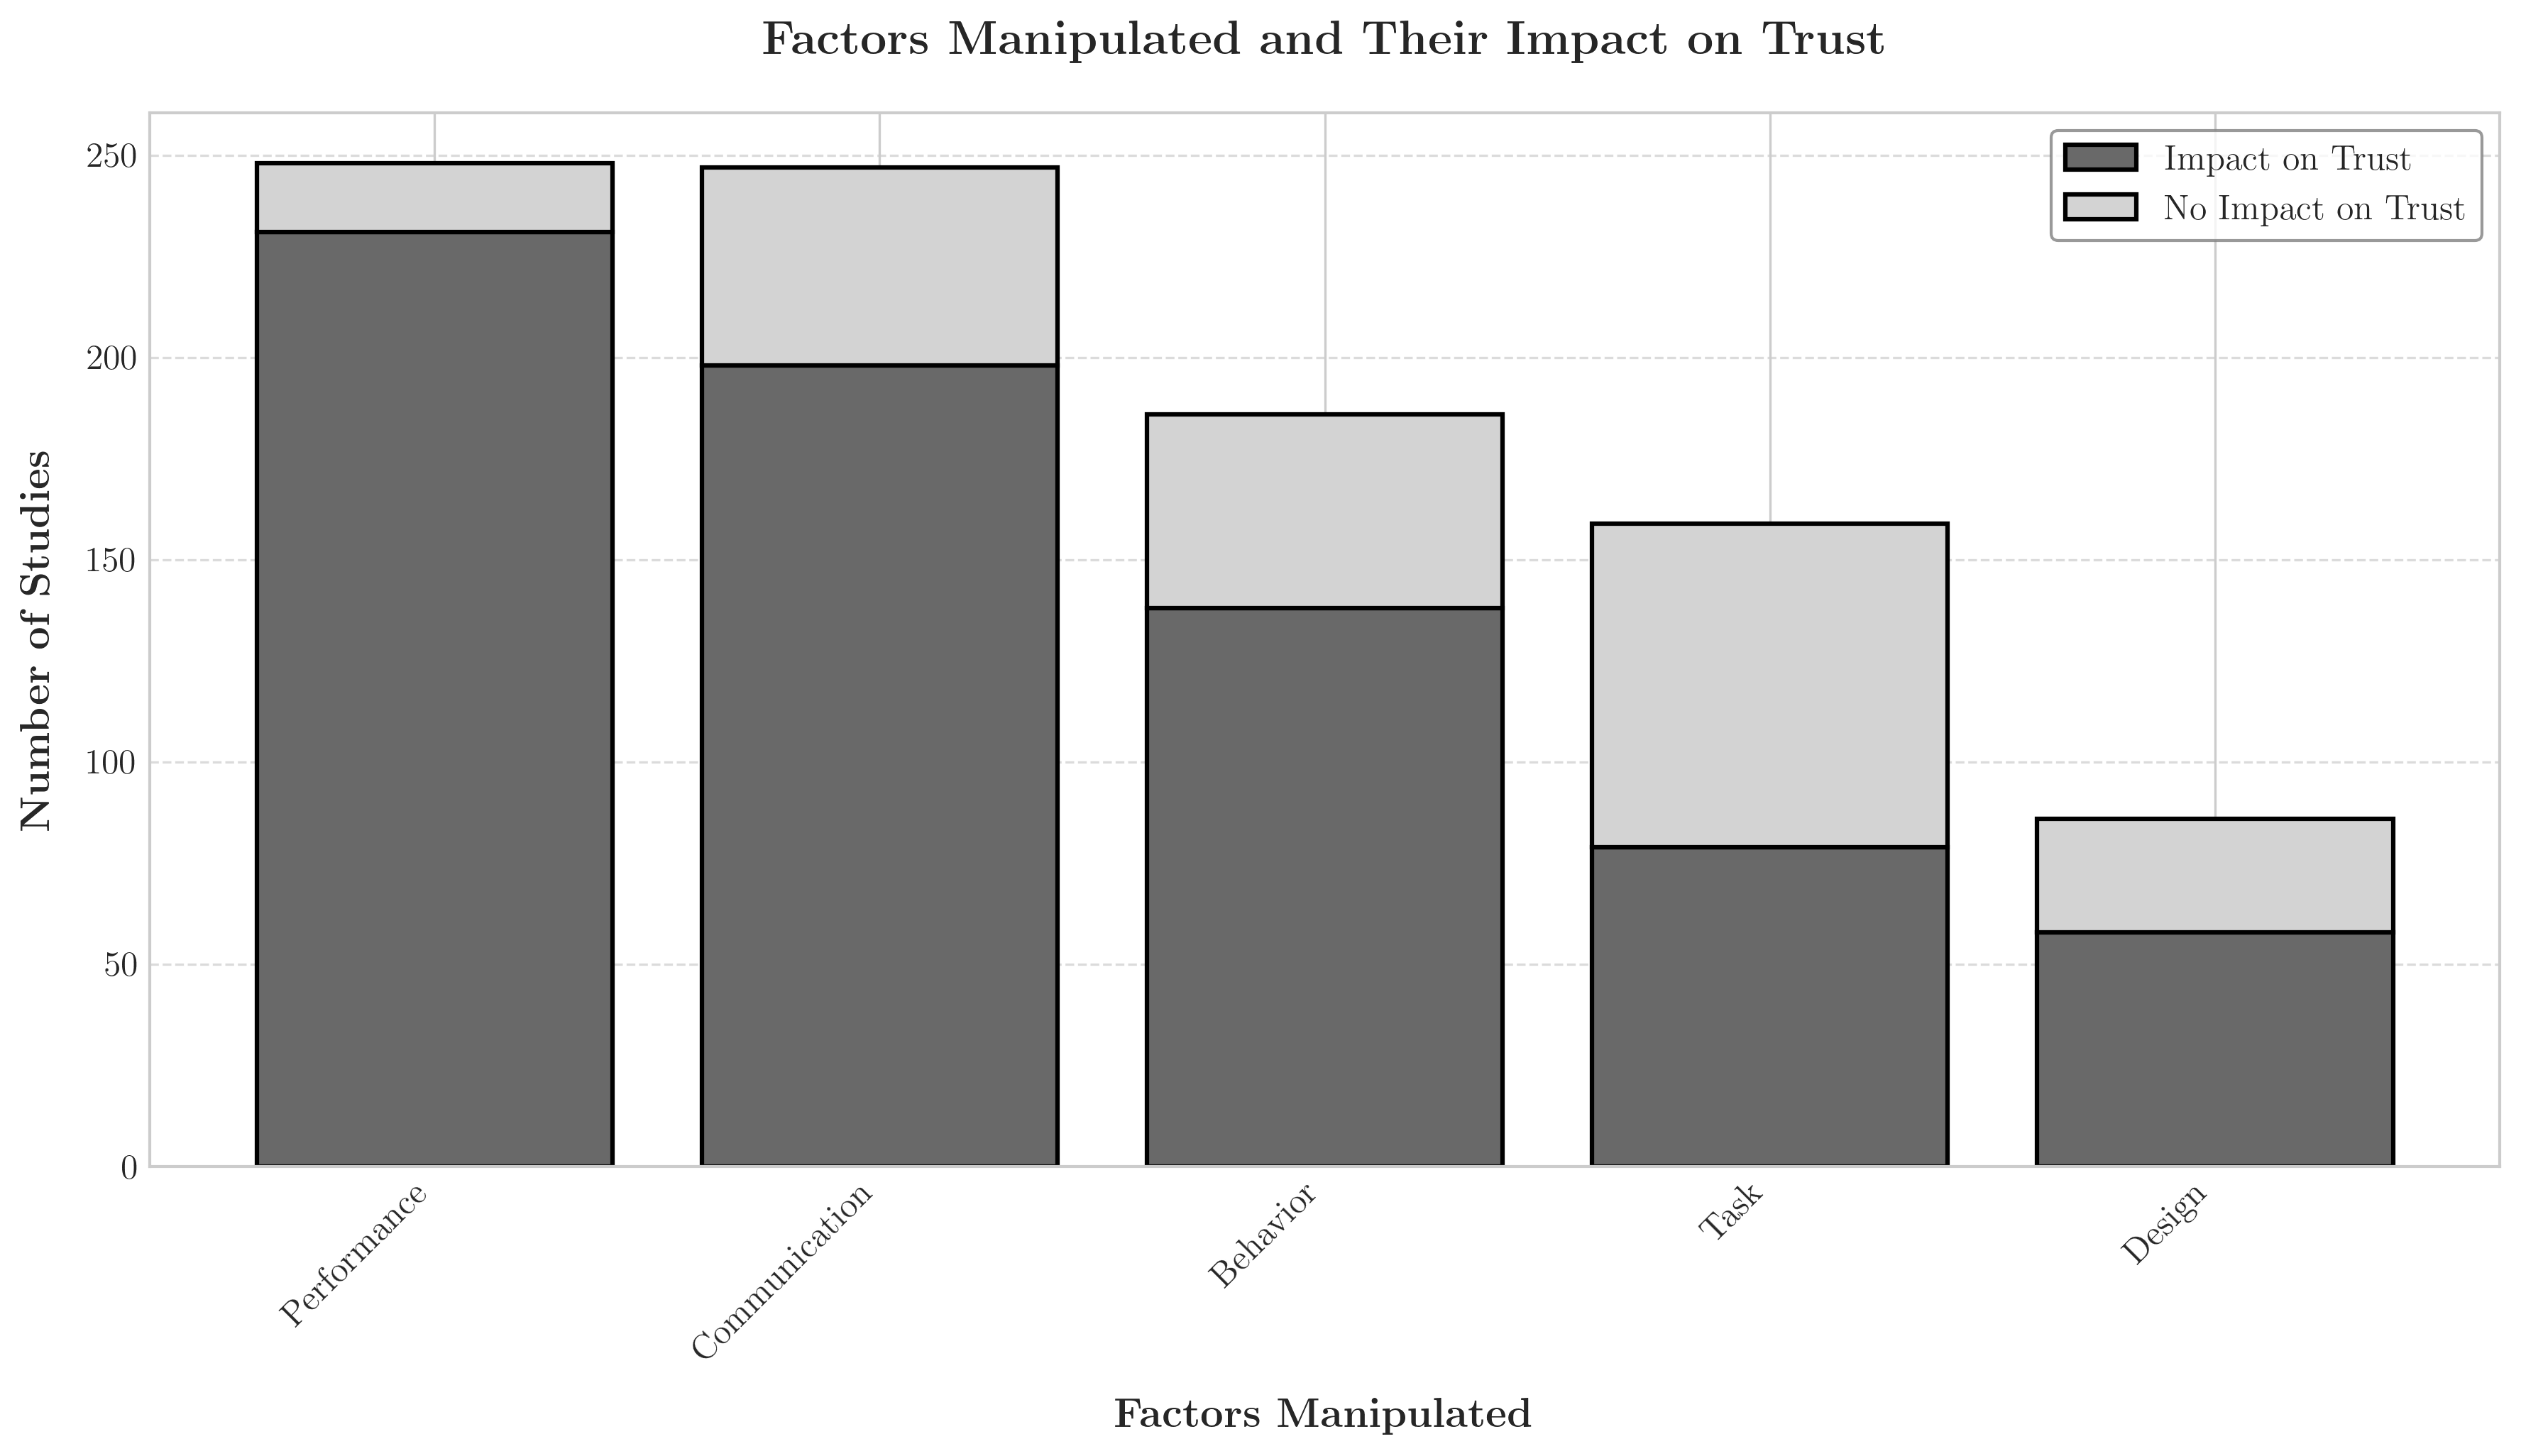

In [7]:

columns_mapping = {
    'Performance': ['Robot-accuracy'],
    'Behavior': ['Robot-task-strategy', 'Task-strategy', 'Robot-autonomy', 'Robot-adaptability', 'Robot-morality'],
    'Communication': [
        'Robot-verbal-communication-style', 'Robot-verbal-communication-content', 
        'Robot-nonverbal-communication', 'Robot-social-attitude', 'Robot-social-timing', 
        'Robot-emotional-display'
    ],
    'Design': ['Robot-aesthetics', 'Robot-interface-design', 'Robot-types'],
    'Task': ['Teaming', 'Task-environment', 'Task-constraints', 'Task-complexity']
}


def map_to_high_level_factors(df, detailed_column, high_level_column, mapping):
    """
    Maps detailed factors to high-level categories without causing SettingWithCopyWarning.
    
    Args:
        df (pd.DataFrame): The dataframe containing the detailed factors.
        detailed_column (str): Column name for the detailed factors.
        high_level_column (str): Column name for the high-level factors.
        mapping (dict): Dictionary mapping high-level categories to detailed factors.

    Returns:
        pd.DataFrame: Dataframe with the new high-level column added.
    """
    # Reverse the mapping to map detailed to high-level
    detailed_to_high_level = {}
    for high_level, detailed_list in mapping.items():
        for detail in detailed_list:
            detailed_to_high_level.setdefault(detail, []).append(high_level)
    
    def map_factors(detailed_factors):
        # Handle missing or invalid values and map factors
        if not isinstance(detailed_factors, list):
            return None
        high_level = set()
        for factor in detailed_factors:
            if factor in detailed_to_high_level:
                high_level.update(detailed_to_high_level[factor])
        return "; ".join(sorted(high_level)) if high_level else None

    # Create a copy of the column to avoid modifying a slice
    detailed_column_cleaned = (
        df[detailed_column]
        .fillna('')
        .str.split(';')
        .apply(lambda x: [factor.strip() for factor in x if factor.strip()])
    )
    
    # Apply mapping and add as a new column
    df = df.copy()
    df[high_level_column] = detailed_column_cleaned.apply(map_factors)
    
    return df


def plot_factor_bars_formatted(df, x_label: str, y_label: str, title: str):
    """
    Plot stacked bar charts for 'factors_manipulated', grouped by whether they did or did not impact trust.
    Each bar represents the number of 'basic_study_info.valid_participants' for each factor.
    """
    # Settings for academic style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'text.usetex': True,
        'font.family': 'serif',
        'text.latex.preamble': r'\usepackage{amsmath}',
    })
    
    # Define columns
    factors_manipulated_col = 'experimental_manipulation.factors_manipulated_high_level'
    did_impact_col = 'experimental_manipulation.factors_that_impacted_trust_high_level'
    did_not_impact_col = 'experimental_manipulation.factors_that_did_not_impact_trust_high_level'
    participants_col = 'basic_study_info.valid_participants'

    # Explode and clean 'factors_manipulated'
    df = df.copy()
    df[factors_manipulated_col] = df[factors_manipulated_col].fillna('').str.split(';')
    df[factors_manipulated_col] = df[factors_manipulated_col].apply(lambda x: [cat.strip() for cat in x if cat.strip()])
    df = df.explode(factors_manipulated_col)

    # Explode and clean 'did impact' and 'did not impact'
    df[did_impact_col] = df[did_impact_col].fillna('').str.split(';')
    df[did_impact_col] = df[did_impact_col].apply(lambda x: [cat.strip() for cat in x if cat.strip()])
    df[did_not_impact_col] = df[did_not_impact_col].fillna('').str.split(';')
    df[did_not_impact_col] = df[did_not_impact_col].apply(lambda x: [cat.strip() for cat in x if cat.strip()])

    # Label rows as 'did_impact' or 'did_not_impact' based on the factors
    def impact_label(row):
        if row[factors_manipulated_col] in row[did_impact_col]:
            return 'did_impact'
        elif row[factors_manipulated_col] in row[did_not_impact_col]:
            return 'did_not_impact'
        return 'unknown'

    df['impact_label'] = df.apply(impact_label, axis=1)

    # Filter out rows without proper labels
    df = df[df['impact_label'].isin(['did_impact', 'did_not_impact'])]

    # Aggregate participant counts for each factor and impact label
    aggregated = df.groupby([factors_manipulated_col, 'impact_label'])[participants_col].count().unstack(fill_value=0)
    
    # Sort factors by total impact
    factor_order = aggregated['did_impact'].sort_values(ascending=False).index
    aggregated = aggregated.reindex(factor_order)

    # Create plot with higher DPI
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
    
    # Create stacked bars
    ax.bar(aggregated.index, aggregated['did_impact'], 
           label='Impact on Trust', color='dimgray', 
           edgecolor='black', linewidth=1.5)
    
    ax.bar(aggregated.index, aggregated['did_not_impact'], 
           bottom=aggregated['did_impact'],
           label='No Impact on Trust', color='lightgray', 
           edgecolor='black', linewidth=1.5)

    # Customize with bold LaTeX labels
    ax.set_title(rf'\textbf{{{title}}}', pad=20)
    ax.set_xlabel(rf'\textbf{{{x_label}}}', labelpad=10)
    ax.set_ylabel(rf'\textbf{{{y_label}}}', labelpad=10)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    # Add legend and grid
    ax.legend(frameon=True, edgecolor='gray')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and display
    plt.tight_layout()
    plt.savefig('factor_manipulation_bars.pdf', format='pdf', bbox_inches='tight')
    plt.show()


data2 = filter_data(data, column='experimental_manipulation.manipulation_present', value=True)
# Apply function
data2 = map_to_high_level_factors(
    data2, 
    'experimental_manipulation.factors_manipulated', 
    'experimental_manipulation.factors_manipulated_high_level', 
    columns_mapping
)
data2 = map_to_high_level_factors(
    data2, 
    'experimental_manipulation.factors_that_impacted_trust', 
    'experimental_manipulation.factors_that_impacted_trust_high_level', 
    columns_mapping
)
data2 = map_to_high_level_factors(
    data2, 
    'experimental_manipulation.factors_that_did_not_impact_trust', 
    'experimental_manipulation.factors_that_did_not_impact_trust_high_level', 
    columns_mapping
)

plot_factor_bars_formatted(
    data2,
    y_label="Number of Studies",
    x_label="Factors Manipulated",
    title="Factors Manipulated and Their Impact on Trust"
)




LaTeX Table for task_classification.high_level_task:

\begin{table}
\caption{Trust Factors by High-level Task}
\label{tab:trust_factors_task_classification_high_level_task}
\begin{tabular}{lrrrrr}
\toprule
Factor & Performance & Behavior & Communication & Design & Task \\
\midrule
Evaluation & \cellcolor[HTML]{111111}\textcolor{white}{0.94} & \cellcolor[HTML]{959595}\textcolor{black}{0.50} & \cellcolor[HTML]{444444}\textcolor{white}{0.79} & \cellcolor[HTML]{575757}\textcolor{white}{0.73} & \cellcolor[HTML]{8f8f8f}\textcolor{black}{0.53} \\
Game & \cellcolor[HTML]{131313}\textcolor{white}{0.94} & \cellcolor[HTML]{3c3c3c}\textcolor{white}{0.81} & \cellcolor[HTML]{555555}\textcolor{white}{0.74} & \cellcolor[HTML]{898989}\textcolor{black}{0.55} & \cellcolor[HTML]{a3a3a3}\textcolor{black}{0.46} \\
Manipulation & \cellcolor[HTML]{282828}\textcolor{white}{0.86} & \cellcolor[HTML]{5a5a5a}\textcolor{white}{0.72} & \cellcolor[HTML]{4e4e4e}\textcolor{white}{0.76} & \cellcolor[HTML]{686868}\textc

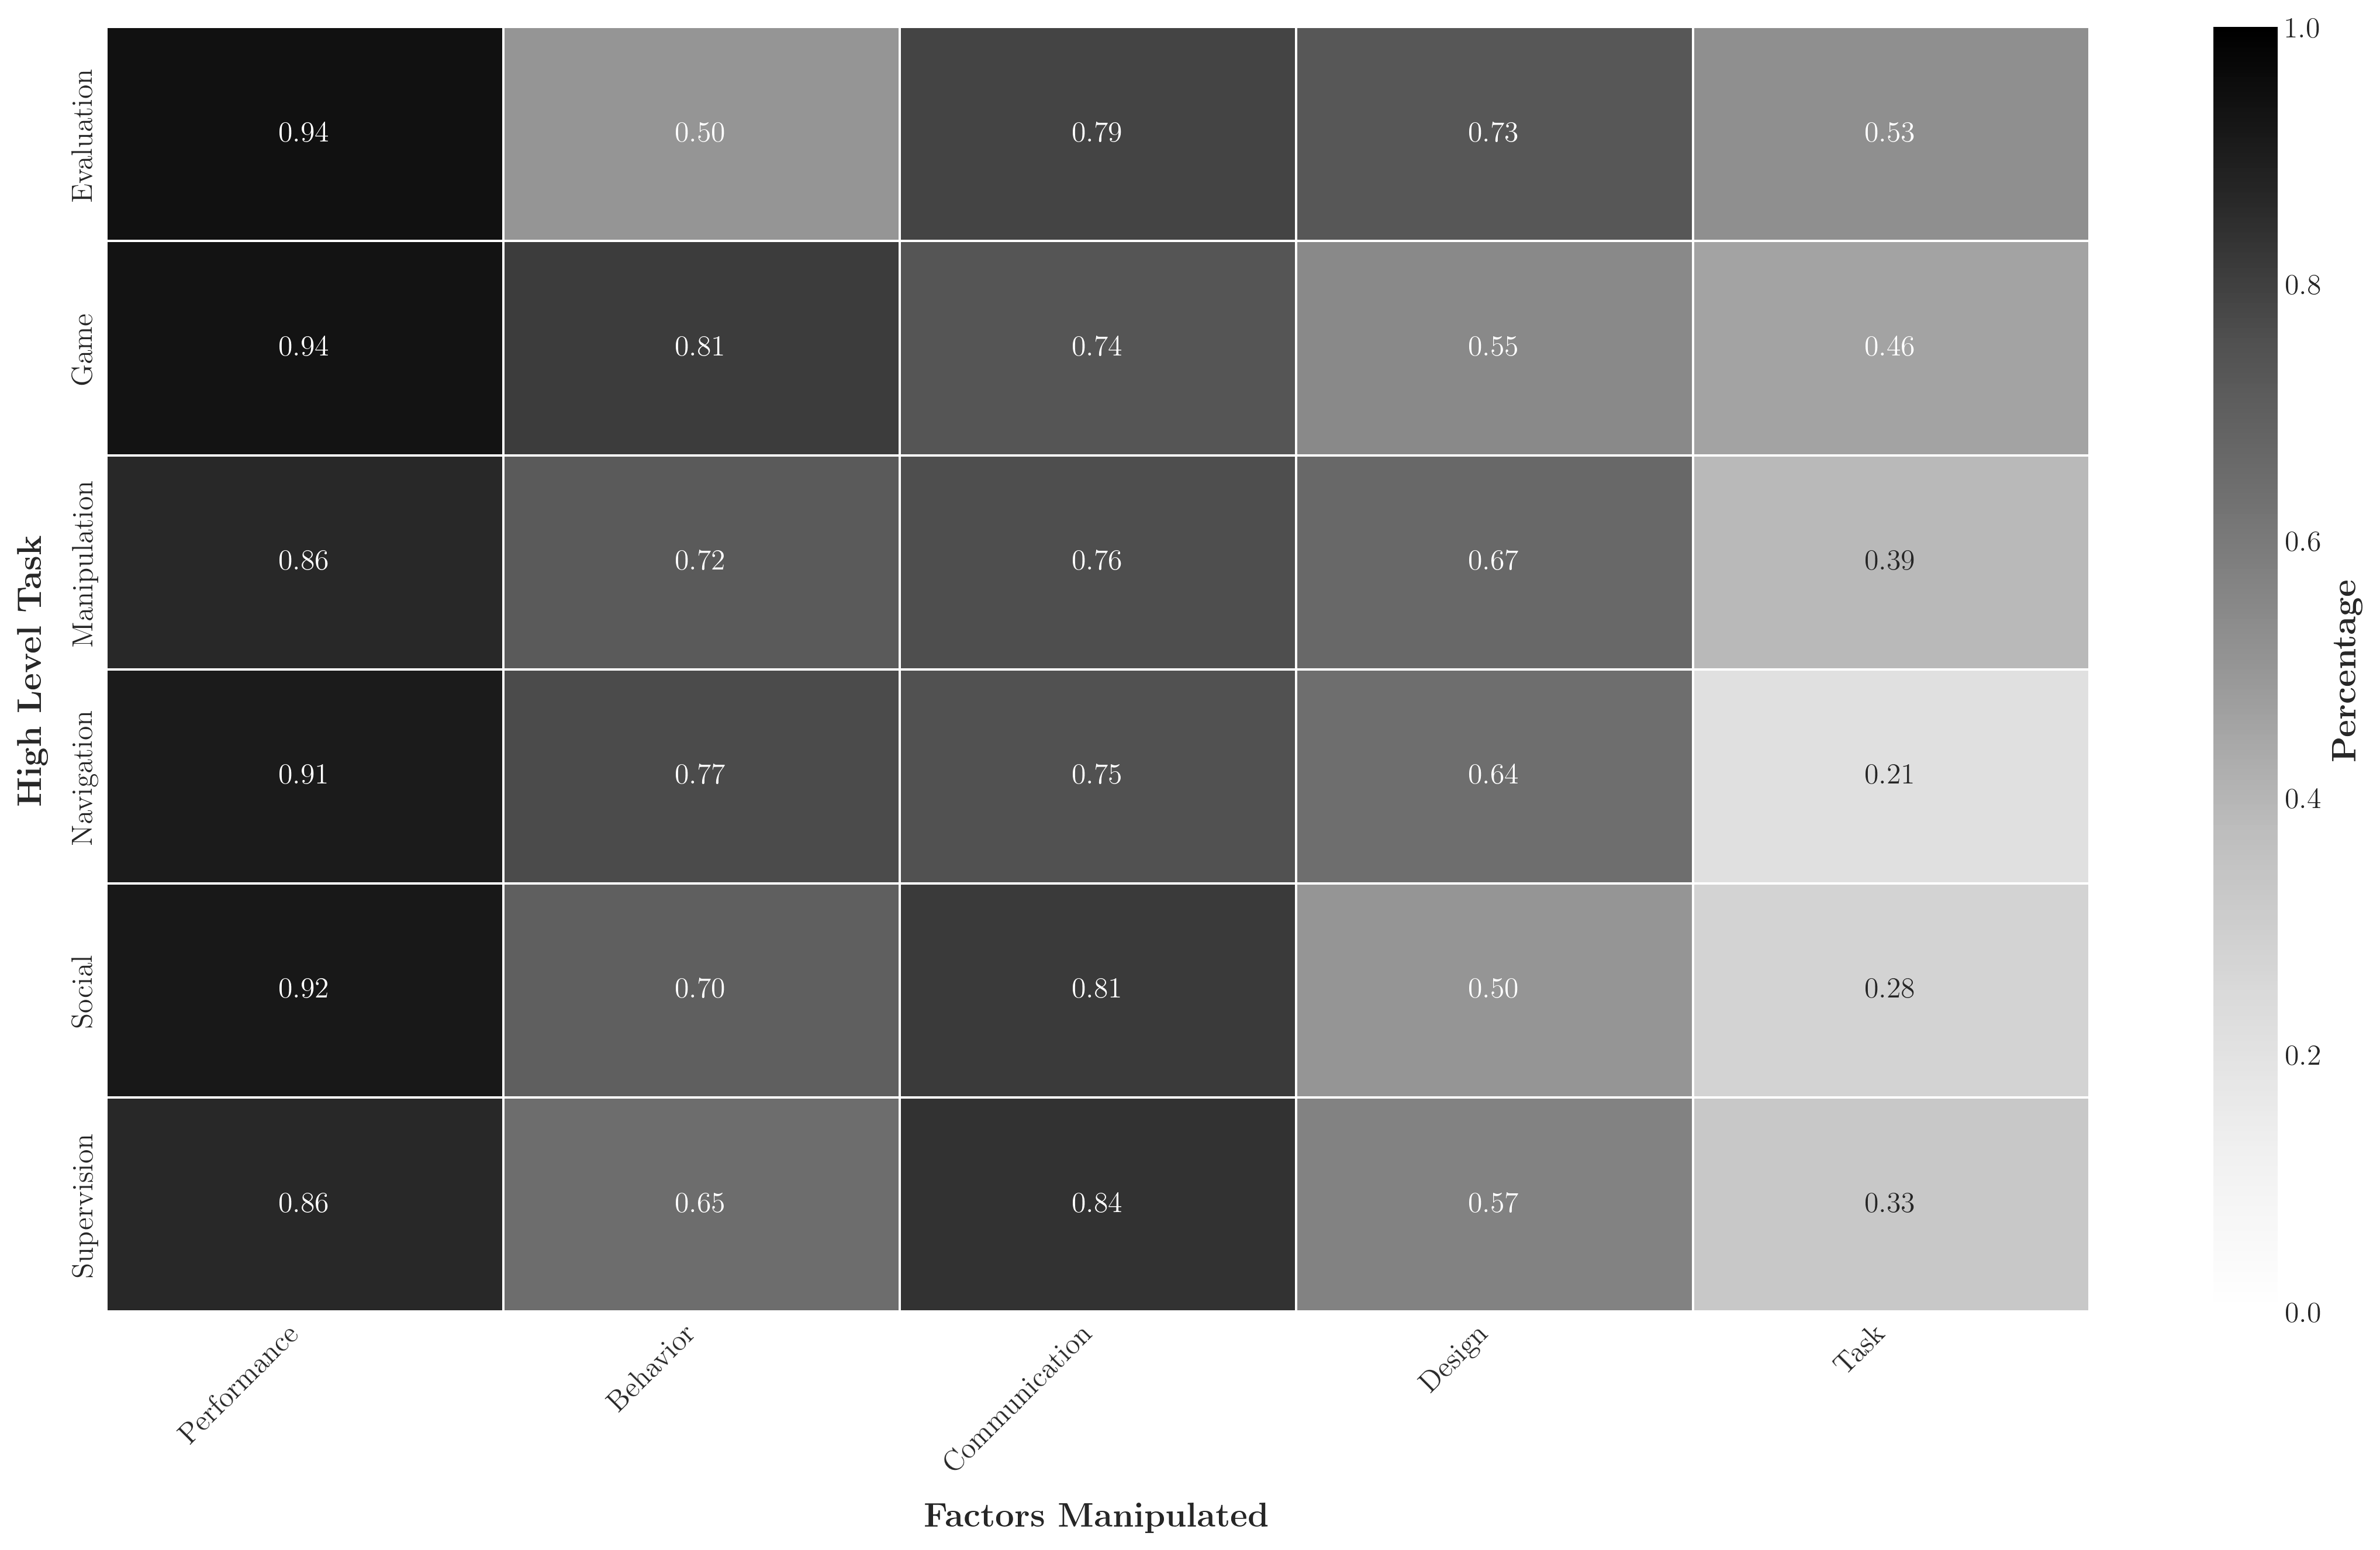


LaTeX Table for immersiveness.classification:

\begin{table}
\caption{Trust Factors by Experimental Environment}
\label{tab:trust_factors_immersiveness_classification}
\begin{tabular}{lrrrrr}
\toprule
Factor & Performance & Behavior & Communication & Design & Task \\
\midrule
media & \cellcolor[HTML]{1c1c1c}\textcolor{white}{0.91} & \cellcolor[HTML]{7f7f7f}\textcolor{white}{0.58} & \cellcolor[HTML]{3f3f3f}\textcolor{white}{0.80} & \cellcolor[HTML]{646464}\textcolor{white}{0.68} & \cellcolor[HTML]{686868}\textcolor{white}{0.67} \\
real-world & \cellcolor[HTML]{282828}\textcolor{white}{0.86} & \cellcolor[HTML]{606060}\textcolor{white}{0.70} & \cellcolor[HTML]{515151}\textcolor{white}{0.75} & \cellcolor[HTML]{5e5e5e}\textcolor{white}{0.70} & \cellcolor[HTML]{c4c4c4}\textcolor{black}{0.34} \\
simulation & \cellcolor[HTML]{1b1b1b}\textcolor{white}{0.91} & \cellcolor[HTML]{5e5e5e}\textcolor{white}{0.71} & \cellcolor[HTML]{363636}\textcolor{white}{0.82} & \cellcolor[HTML]{898989}\textcolor{b

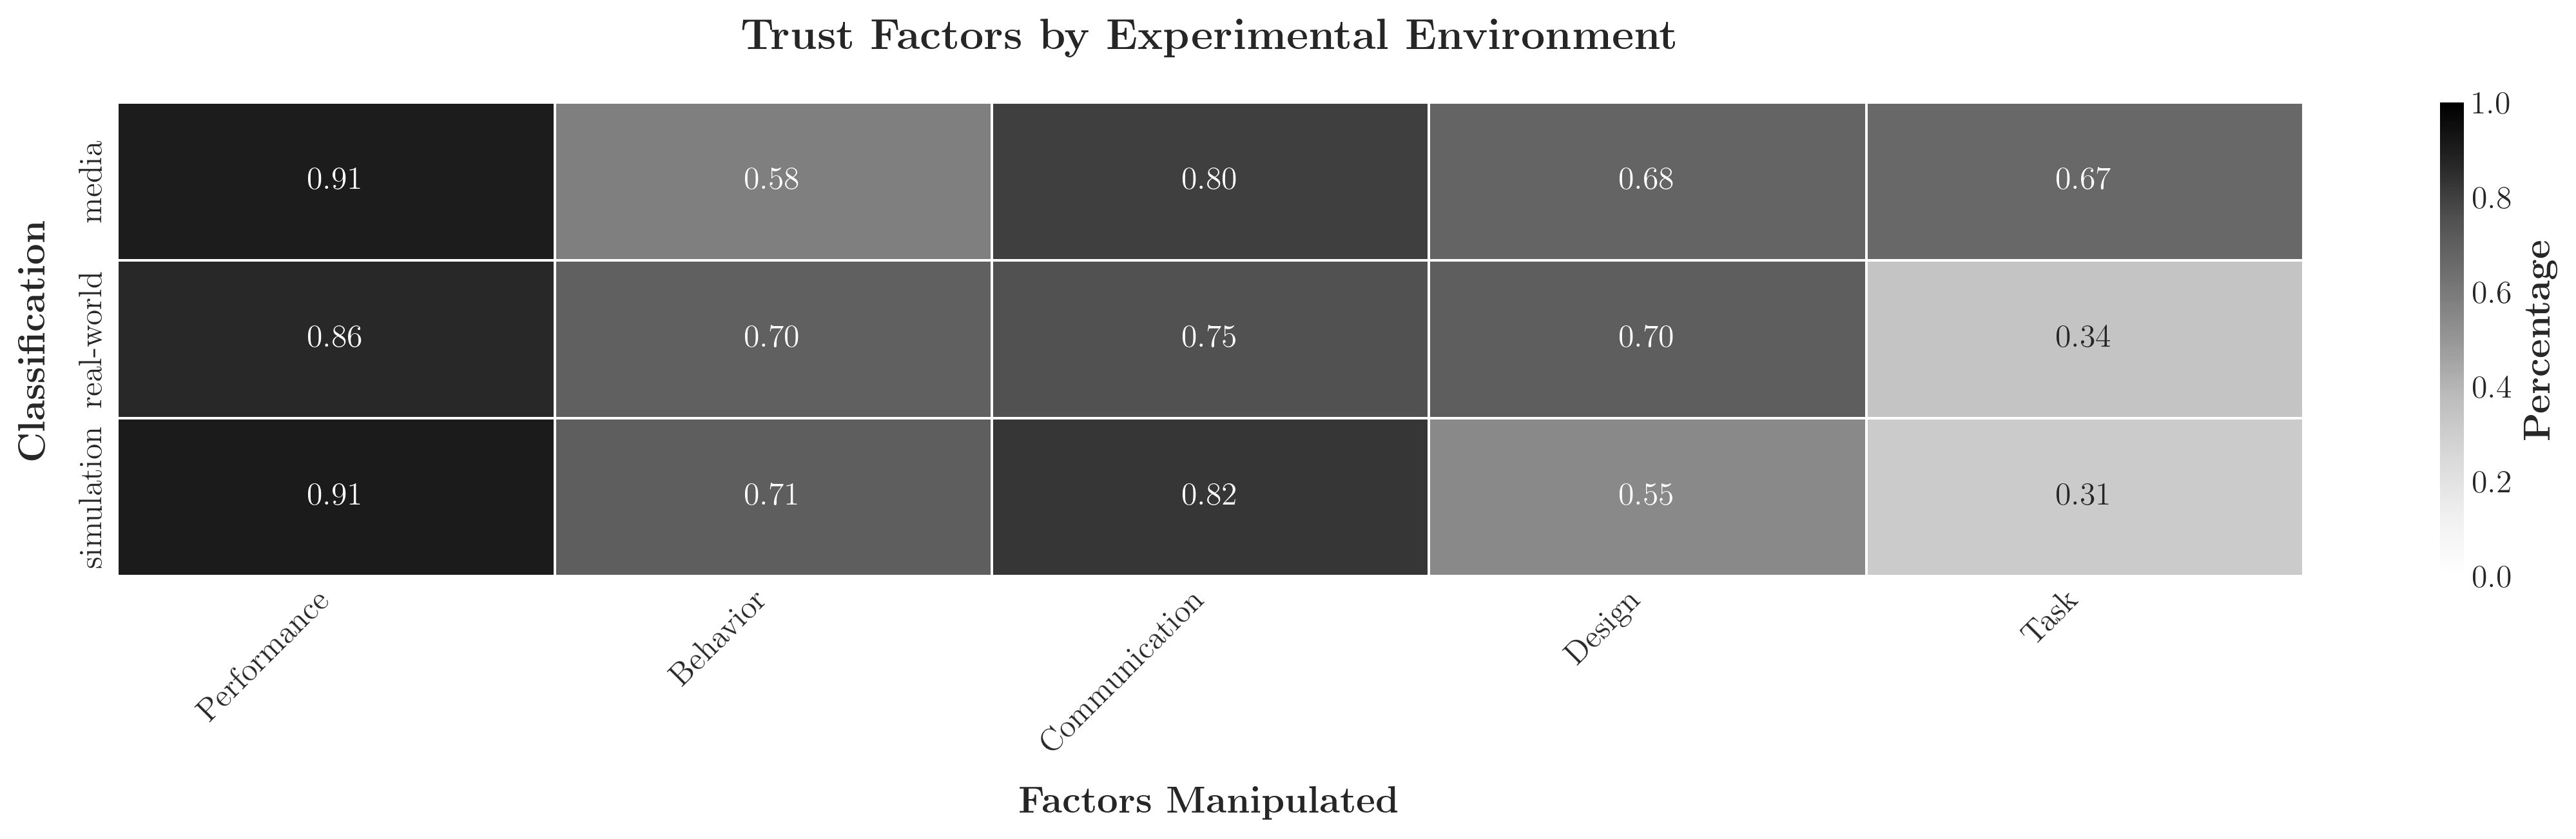


LaTeX Table for interaction_intensity.classification:

\begin{table}
\caption{Trust Factors by Interaction Intensity}
\label{tab:trust_factors_interaction_intensity_classification}
\begin{tabular}{lrrrrr}
\toprule
Factor & Performance & Behavior & Communication & Design & Task \\
\midrule
direct-contact interaction & \cellcolor[HTML]{333333}\textcolor{white}{0.83} & \cellcolor[HTML]{414141}\textcolor{white}{0.79} & \cellcolor[HTML]{707070}\textcolor{white}{0.64} & \cellcolor[HTML]{5c5c5c}\textcolor{white}{0.71} & \cellcolor[HTML]{dcdcdc}\textcolor{black}{0.24} \\
minimal interaction & \cellcolor[HTML]{1c1c1c}\textcolor{white}{0.91} & \cellcolor[HTML]{626262}\textcolor{white}{0.69} & \cellcolor[HTML]{3c3c3c}\textcolor{white}{0.81} & \cellcolor[HTML]{818181}\textcolor{black}{0.58} & \cellcolor[HTML]{c6c6c6}\textcolor{black}{0.33} \\
passive observation & \cellcolor[HTML]{1c1c1c}\textcolor{white}{0.90} & \cellcolor[HTML]{898989}\textcolor{black}{0.55} & \cellcolor[HTML]{464646}\textcolor

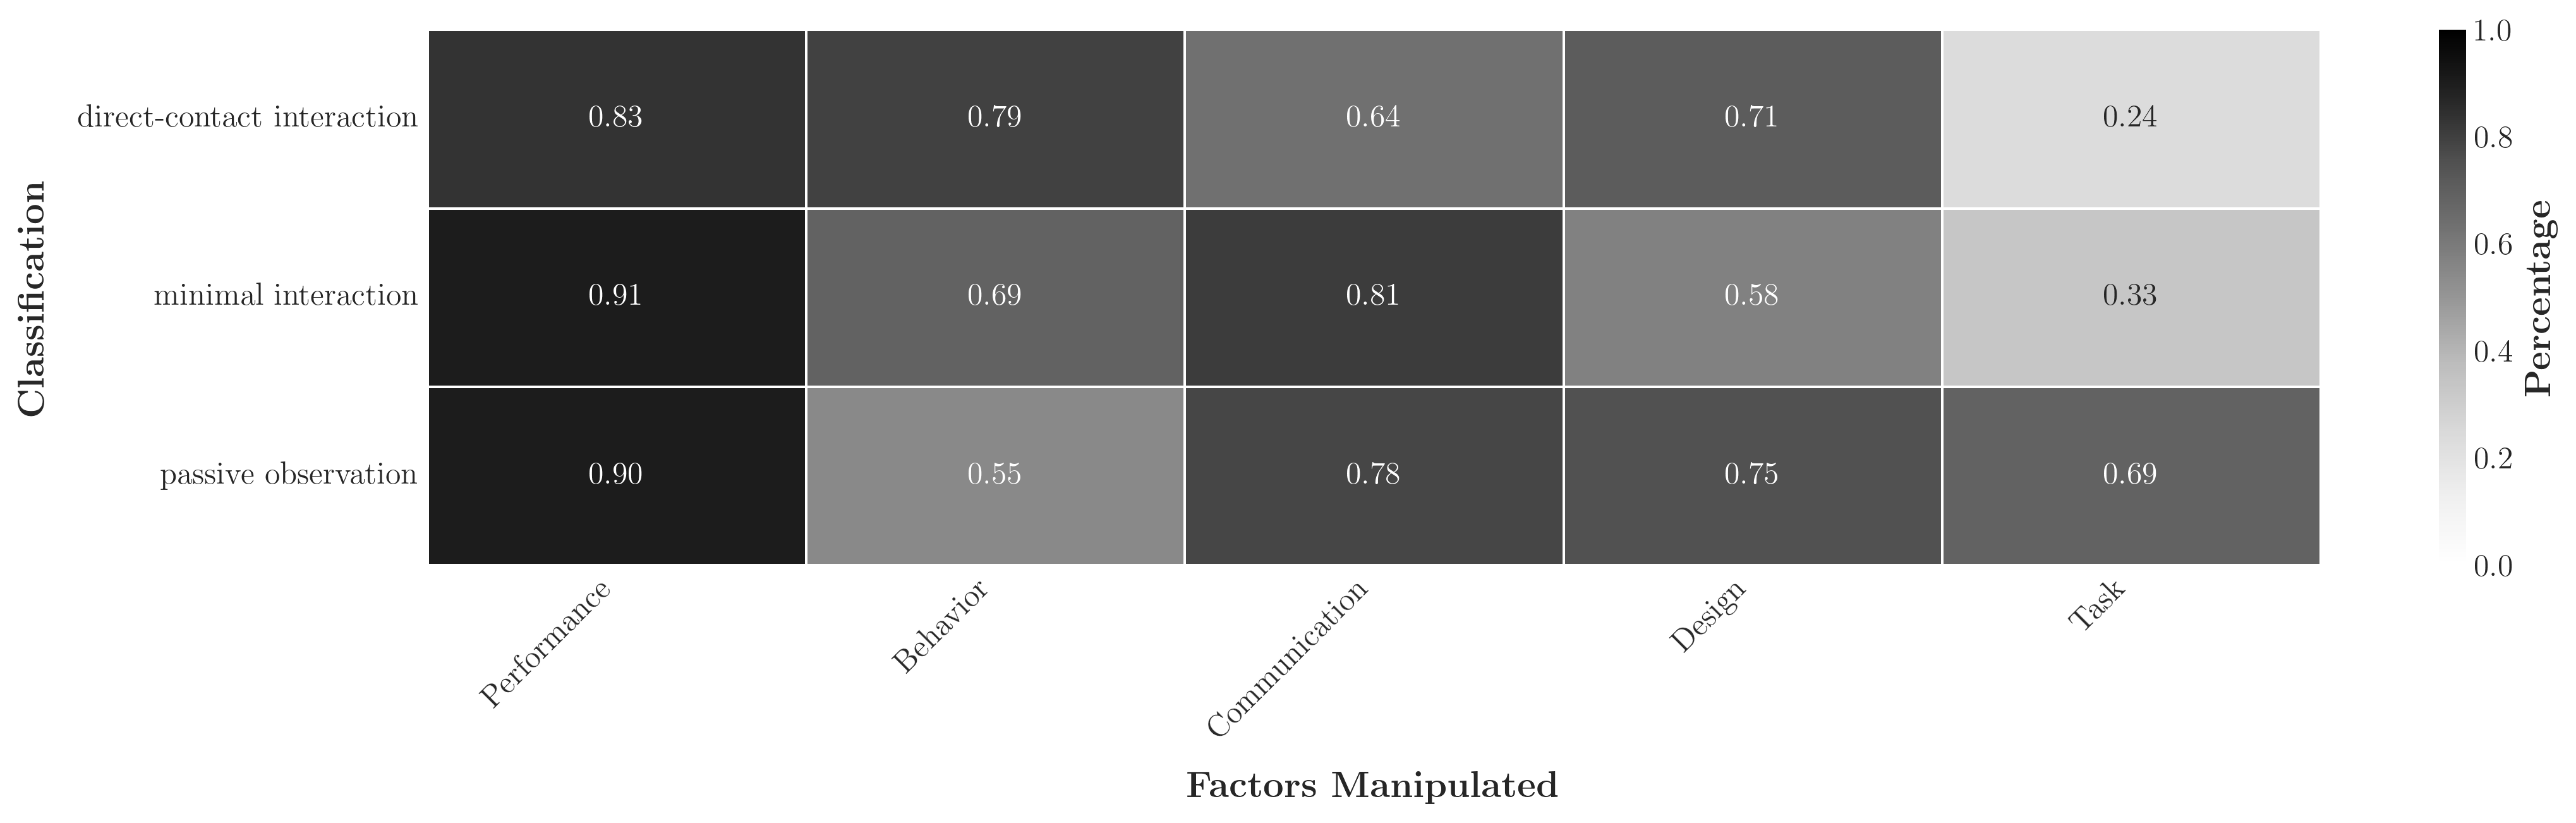

In [8]:
def prepare_heatmap_data(df, x_factors, factor_column='experimental_manipulation.factors_manipulated_high_level', y_column='task_classification.high_level_task'):
    """
    Prepare the heatmap data for factor manipulation.

    Parameters:
        df (pd.DataFrame): The input data containing manipulated and impacted factors.
        x_factors (list): List of factors to include on the X-axis.

    Returns:
        pd.DataFrame: A DataFrame suitable for heatmap generation.
    """
    # Extract and split factors into lists
       # Extract and split factors into lists, handling NaN values
    df = df.copy()
    df['manipulated_split'] = df[factor_column].fillna("").str.split('; ')

    # Exclude rows with no manipulated factors
    df = df[df['manipulated_split'].apply(lambda x: len(x) > 0 and isinstance(x, list))]

    
    # Exclude rows with no manipulated factors
    df = df[df['manipulated_split'].apply(lambda x: bool(x))]

    # Prepare a new DataFrame for factor counts
    rows = []
    for _, row in df.iterrows():
        for factor in row['manipulated_split']:
            if factor in x_factors:
                rows.append({
                    'Y': row[y_column],  # Use your desired Y-column
                    'Factor': factor
                })

    # Create a DataFrame for the rows
    heatmap_data = pd.DataFrame(rows)

    # Pivot the data to create a matrix for heatmap
    heatmap_matrix = heatmap_data.pivot_table(
        index='Y',
        columns='Factor',
        aggfunc='size',
        fill_value=0
    ).reindex(columns=x_factors)

    return heatmap_matrix

def plot_factor_heatmap(
        data, 
        count_or_percentage, 
        y_column, factors_to_include,
        y_label: str,
        title: str,
        add_x_label: bool = False
    ):
    heatmap_df = prepare_heatmap_data(data, factors_to_include, factor_column='experimental_manipulation.factors_manipulated_high_level', y_column=y_column)
    if count_or_percentage == 'percentage':
        impacted_df = prepare_heatmap_data(data, factors_to_include, factor_column='experimental_manipulation.factors_that_impacted_trust_high_level', y_column=y_column)
        heatmap_df = impacted_df/heatmap_df 


    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'text.usetex': True,
        'font.family': 'serif',
        'text.latex.preamble': r'\usepackage{amsmath}',
    })

    # Create the heatmap
    # heatmap_df = heatmap_df.reindex(factors_to_include)

    fig, ax = plt.subplots(figsize=(15, 1.5*heatmap_df.shape[0]), dpi=300)
    
    sns.heatmap(
        heatmap_df,
        cmap='Greys',
        annot=True,
        fmt='.2f' if count_or_percentage == 'percentage' else 'd',
        linewidths=0.5,
        cbar_kws={'label': r'\textbf{Count}' if count_or_percentage == 'count' else r'\textbf{Percentage}'},
        ax=ax,
        vmax=1, vmin=0
    )

    # Customize axes and title
    if title is not None:
        ax.set_title(rf'\textbf{{{title}}}', pad=20)
    if add_x_label:
        ax.set_xlabel(r'\textbf{Factors Manipulated}', labelpad=10)
    ax.set_ylabel(rf'\textbf{{{y_label}}}', labelpad=10)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Save and display
    plt.tight_layout()
    plt.savefig(f'factor_heatmap_{count_or_percentage}_{y_column}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

def create_latex_color_cell(value, background_color, text_color):
    """Create a LaTeX cell with background color and text color"""
    bg_color = background_color.replace('#', '')
    return f"\\cellcolor[HTML]{{{bg_color}}}\\textcolor{{{text_color}}}{{{value:.2f}}}"

def custom_latex_formatter(data, cmap='Greys'):
    """Format DataFrame cells with LaTeX color commands"""
    cmap = plt.get_cmap(cmap)
    styled_df = data.copy()
    vmin, vmax = 0, 1
    norm = plt.Normalize(vmin, vmax)
    
    def style_cell(val):
        if pd.isna(val):
            return ''
        
        rgb = cmap(norm(val))
        bg_color = rgb2hex(rgb[:3])
        luminance = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
        text_color = 'white' if luminance < 0.5 else 'black'
        
        return create_latex_color_cell(val, bg_color, text_color)
    
    for col in styled_df.columns:
        styled_df[col] = styled_df[col].apply(style_cell)
    
    return styled_df

def map_to_high_level_factors(df, detailed_column, high_level_column, mapping):
    """Maps detailed factors to high-level categories without causing SettingWithCopyWarning."""
    detailed_to_high_level = {}
    for high_level, detailed_list in mapping.items():
        for detail in detailed_list:
            detailed_to_high_level.setdefault(detail, []).append(high_level)
    
    def map_factors(detailed_factors):
        if not isinstance(detailed_factors, list):
            return None
        high_level = set()
        for factor in detailed_factors:
            if factor in detailed_to_high_level:
                high_level.update(detailed_to_high_level[factor])
        return "; ".join(sorted(high_level)) if high_level else None

    detailed_column_cleaned = (
        df[detailed_column]
        .fillna('')
        .str.split(';')
        .apply(lambda x: [factor.strip() for factor in x if factor.strip()])
    )
    
    df = df.copy()
    df[high_level_column] = detailed_column_cleaned.apply(map_factors)
    
    return df

def prepare_heatmap_data(df, x_factors, factor_column='experimental_manipulation.factors_manipulated_high_level', y_column='task_classification.high_level_task'):
    """Prepare the heatmap data for factor manipulation."""
    df = df.copy()
    df['manipulated_split'] = df[factor_column].fillna("").str.split('; ')
    
    df = df[df['manipulated_split'].apply(lambda x: len(x) > 0 and isinstance(x, list))]
    df = df[df['manipulated_split'].apply(lambda x: bool(x))]

    rows = []
    for _, row in df.iterrows():
        for factor in row['manipulated_split']:
            if factor in x_factors:
                rows.append({
                    'Y': row[y_column],
                    'Factor': factor
                })

    heatmap_data = pd.DataFrame(rows)
    heatmap_matrix = heatmap_data.pivot_table(
        index='Y',
        columns='Factor',
        aggfunc='size',
        fill_value=0
    ).reindex(columns=x_factors)

    return heatmap_matrix

def generate_latex_table(data2, factors, y_column='task_classification.high_level_task', caption="Trust Factors by Category"):
    """Generate LaTeX table with color-coded cells."""
    # Prepare the data
    heatmap_df_count = prepare_heatmap_data(
        data2, 
        x_factors=factors,
        factor_column='experimental_manipulation.factors_manipulated_high_level',
        y_column=y_column
    )

    heatmap_df_impacted = prepare_heatmap_data(
        data2, 
        x_factors=factors,
        factor_column='experimental_manipulation.factors_that_impacted_trust_high_level',
        y_column=y_column
    )

    heatmap_df_percentage = heatmap_df_impacted / heatmap_df_count.replace(0, np.nan)

    # Create the styled table with proper LaTeX color commands
    styled_df = custom_latex_formatter(heatmap_df_percentage, cmap='Greys')

    # Create the table content manually
    table_content = []
    for idx, row in styled_df.iterrows():
        table_content.append(f"{idx} & {' & '.join(row.values)} \\\\")

    # Generate complete LaTeX table
    latex_table = f"""\\begin{{table}}
\\caption{{{caption}}}
\\label{{tab:trust_factors_{y_column.replace('.', '_')}}}
\\begin{{tabular}}{{{'l' + 'r' * len(styled_df.columns)}}}
\\toprule
Factor & {' & '.join(styled_df.columns)} \\\\
\\midrule
{chr(10).join(table_content)}
\\bottomrule
\\end{{tabular}}
\\end{{table}}"""

    return latex_table

def process_and_visualize_data(data2, factors):
    """Process data and create visualizations including LaTeX tables."""
    # Generate tables for different categories
    tables = {}
    
    categories = [
        ('task_classification.high_level_task', 'Trust Factors by High-level Task'),
        ('immersiveness.classification', 'Trust Factors by Experimental Environment'),
        ('interaction_intensity.classification', 'Trust Factors by Interaction Intensity')
    ]
    
    for y_column, caption in categories:
        # Generate and store the LaTeX table
        latex_table = generate_latex_table(data2, factors, y_column, caption)
        tables[y_column] = latex_table
        
        # Print the LaTeX code
        print(f"\nLaTeX Table for {y_column}:\n")
        print(latex_table)
        print("\n" + "="*80 + "\n")
        
        # Create the heatmap visualization
        plot_factor_heatmap(
            data2, 
            factors_to_include=factors,
            y_column=y_column,
            count_or_percentage='percentage',
            title=caption if y_column == 'immersiveness.classification' else None,
            y_label=y_column.split('.')[-1].replace('_', ' ').title(),
            add_x_label=True
        )

    return tables

# Main execution
if __name__ == "__main__":
    # Assuming data2 is your filtered dataset and factors is defined
    factors = list(columns_mapping.keys())
    
    # Process data and generate visualizations
    tables = process_and_visualize_data(data2, factors)